In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [2]:
data_path = "../data_after_prep"

In [3]:
list_data = os.listdir(data_path)
list_data

['ADRO2001-2407.csv',
 'AMMN2001-2407.csv',
 'AMRT2001-2407.csv',
 'ASII2001-2407.csv',
 'BBCA2001-2407.csv',
 'GOTO2001-2407.csv',
 'KLBF2001-2407.csv',
 'MAPI2001-2407.csv',
 'TLKM2001-2407.csv']

In [4]:
ADRO = pd.read_csv(data_path + "/" + list_data[0], index_col='date', parse_dates=['date'])
AMMN = pd.read_csv(data_path + "/" + list_data[1], index_col='date', parse_dates=['date'])
AMRT = pd.read_csv(data_path + "/" + list_data[2], index_col='date', parse_dates=['date'])
ASII = pd.read_csv(data_path + "/" + list_data[3], index_col='date', parse_dates=['date'])
BBCA = pd.read_csv(data_path + "/" + list_data[4], index_col='date', parse_dates=['date'])
GOTO = pd.read_csv(data_path + "/" + list_data[5], index_col='date', parse_dates=['date'])
KLBF = pd.read_csv(data_path + "/" + list_data[6], index_col='date', parse_dates=['date'])
MAPI = pd.read_csv(data_path + "/" + list_data[7], index_col='date', parse_dates=['date'])
TLKM = pd.read_csv(data_path + "/" + list_data[8], index_col='date', parse_dates=['date'])



In [5]:
def LSTM_Layer(X_train, y_train, num_epoch):
    # The LSTM architecture
    regressorLSTM = Sequential()
    # First LSTM layer with Dropout regularisation
    regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressorLSTM.add(Dropout(0.2))
    # Second LSTM layer
    regressorLSTM.add(LSTM(units=50, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Third LSTM layer
    regressorLSTM.add(LSTM(units=50, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Fourth LSTM layer
    regressorLSTM.add(LSTM(units=50))
    regressorLSTM.add(Dropout(0.2))
    # The output layer
    regressorLSTM.add(Dense(units=1))

    # Compiling the RNN
    regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
    # Fitting to the training set
    history = regressorLSTM.fit(X_train,y_train,epochs=num_epoch,batch_size=32)

    return history

In [6]:
def GRU_Layer(X_train, y_train):
    # The GRU architecture
    regressorGRU = Sequential()
    # First GRU layer with Dropout regularisation
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Second GRU layer
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Third GRU layer
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Fourth GRU layer
    regressorGRU.add(GRU(units=50, activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # The output layer
    regressorGRU.add(Dense(units=1))
    # Compiling the RNN
    regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

    return regressorGRU

In [7]:
def RNN_Layer(X_train, y_train):
    # initializing the RNN
    regressorRNN = Sequential()
    # # adding first RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding second RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding third RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding fourth RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding the output layer
    regressorRNN.add(Dense(units = 1))
    # compiling RNN
    regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])
    # fitting the RNN
    regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)

    return regressorRNN


In [8]:
#Method
# Some functions to help out with
def plot_predictions(stock_title,test,predicted, title):
    plt.plot(test, color='red',label='Real '+ stock_title+' Stock Price')
    plt.plot(predicted, color='blue',label='Predicted '+ stock_title+' Stock Price')
    plt.title(stock_title + ' Stock Price Prediction '+title)
    plt.xlabel('Time')
    plt.ylabel(stock_title +' Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def return_rmse_norm(test, pred):
    len_pred = len(pred)
    #pred = pred.reshape(len_pred)
    total = np.concatenate((pred, test))
    #total = total.reshape(-1,1)
    total = sc.fit_transform(total)
    arr_pred = total[len_pred:]
    arr_test = total[:len_pred]
    rmse = math.sqrt(mean_squared_error(arr_test, arr_pred))
    print("The root mean squared error after normalization is {}.".format(rmse))
    return rmse

In [64]:
def short_term_train(data, name, start_date, med_date, end_date, epoch, unit, optimizer, batch_size):
    data_short_train = data[start_date:med_date].iloc[:,3:4].values
    data_short_test = data[med_date:end_date].iloc[:,3:4].values

    #Scaling the training set
    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(data_short_train)
    len_train = len(data_short_train)
    len_test = len(data_short_test)
    print(len_train, len_test)

    # Since LSTMs store short term memory state, we create a data structure with 5 timesteps and 1 output
    # So for each element of training set, we have 5 previous training set elements 
    X_train = []
    y_train = []
    for i in range(5,len_train):
        X_train.append(training_set_scaled[i-5:i,0])
        y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    # The LSTM architecture
    regressorLSTM = Sequential()
    # First LSTM layer with Dropout regularisation
    regressorLSTM.add(LSTM(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressorLSTM.add(Dropout(0.2))
    # Second LSTM layer
    regressorLSTM.add(LSTM(units=unit, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Third LSTM layer
    regressorLSTM.add(LSTM(units=unit, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Fourth LSTM layer
    regressorLSTM.add(LSTM(units=unit))
    regressorLSTM.add(Dropout(0.2))
    # The output layer
    regressorLSTM.add(Dense(units=1))

    # Compiling the RNN
    regressorLSTM.compile(optimizer=optimizer,loss='mean_squared_error')
    # Fitting to the training set


    regressorLSTM.fit(X_train,y_train,epochs=epoch,batch_size=batch_size)

    # The GRU architecture
    regressorGRU = Sequential()
    # First GRU layer with Dropout regularisation
    regressorGRU.add(GRU(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Second GRU layer
    regressorGRU.add(GRU(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Third GRU layer
    regressorGRU.add(GRU(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Fourth GRU layer
    regressorGRU.add(GRU(units=unit, activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # The output layer
    regressorGRU.add(Dense(units=1))
    # Compiling the RNN
    regressorGRU.compile(optimizer=optimizer,loss='mean_squared_error')
    # Fitting to the training set
    regressorGRU.fit(X_train,y_train,epochs=epoch,batch_size=batch_size)



    # initializing the RNN
    regressorRNN = Sequential()

    # adding first RNN layer and dropout regulatization
    regressorRNN.add(
        SimpleRNN(units = unit, 
                activation = "tanh", 
                return_sequences = True, 
                input_shape = (X_train.shape[1],1))
                )

    regressorRNN.add(
        Dropout(0.2)
                )


    # adding second RNN layer and dropout regulatization

    regressorRNN.add(
        SimpleRNN(units = unit, 
                activation = "tanh", 
                return_sequences = True)
                )

    regressorRNN.add(
        Dropout(0.2)
                )

    # adding third RNN layer and dropout regulatization

    regressorRNN.add(
        SimpleRNN(units = unit, 
                activation = "tanh", 
                return_sequences = True)
                )

    regressorRNN.add(
        Dropout(0.2)
                )

    # adding fourth RNN layer and dropout regulatization

    regressorRNN.add(
        SimpleRNN(units = unit)
                )

    regressorRNN.add(
        Dropout(0.2)
                )

    # adding the output layer
    regressorRNN.add(Dense(units = 1))

    # compiling RNN
    regressorRNN.compile(
        optimizer = optimizer, 
        loss = "mean_squared_error",
        metrics = ["accuracy"])

    # fitting the RNN
    regressorRNN.fit(X_train, y_train, epochs = epoch, batch_size = batch_size)


    dataset_total = pd.concat((data["close"][start_date:med_date],data["close"][med_date:end_date]),axis=0)
    inputs = dataset_total[len(dataset_total)-len(data_short_test) - 5:].values
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test and predicting the prices
    X_test = []
    for i in range(5,len_test+5):
        X_test.append(inputs[i-5:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
    LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
    GRU_predicted_stock_price = regressorGRU.predict(X_test)
    GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
    RNN_predicted_stock_price = regressorRNN.predict(X_test)
    RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)
    # Visualize the data
    # Plot the data
    train = data[start_date:med_date]
    valid = data[med_date:end_date]
    valid['pred_lstm'] = LSTM_predicted_stock_price
    valid['pred_gru'] = GRU_predicted_stock_price
    valid['pred_rnn'] = RNN_predicted_stock_price
    # Visualize the data
    plt.figure(figsize=(16,6))
    plt.title('Model LSTM, GRU, and RNN in ' + name +' Short Term Predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
    plt.plot(train['close'])
    plt.plot(valid['close'])
    plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
    plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
    plt.savefig('../result tuning/'+name+'short_'+str(optimizer)+'_'+str(batch_size)+'_'+str(epoch)+'_'+str(unit)+'.png')
    # Evaluating the LSTM
    rmse_data_short_LSTM = return_rmse(data_short_test, LSTM_predicted_stock_price)
    norm_rmse_data_short_LSTM = return_rmse_norm(data_short_test, LSTM_predicted_stock_price)
    # Evaluating the RNN
    rmse_data_short_GRU = return_rmse(data_short_test, GRU_predicted_stock_price)
    norm_rmse_data_short_GRU = return_rmse_norm(data_short_test, GRU_predicted_stock_price)
    # Evaluating the sequence
    rmse_data_short_RNN = return_rmse(data_short_test, RNN_predicted_stock_price)
    norm_rmse_data_short_RNN = return_rmse_norm(data_short_test, RNN_predicted_stock_price)
    return(rmse_data_short_LSTM, rmse_data_short_GRU, rmse_data_short_RNN, norm_rmse_data_short_LSTM, norm_rmse_data_short_GRU, norm_rmse_data_short_RNN)



In [65]:
def long_term_train(data, name, year, epoch, unit, optimizer, batch_size):
    data_long_train = data[:year].iloc[:,3:4].values
    data_long_test = data[year:].iloc[:,3:4].values

    #Scaling the training set
    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(data_long_train)
    len_train = len(data_long_train)
    len_test = len(data_long_test)
    print(len_train, len_test)

    # Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
    # So for each element of training set, we have 5 previous training set elements 
    X_train = []
    y_train = []
    for i in range(60,len_train):
        X_train.append(training_set_scaled[i-60:i,0])
        y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    # The LSTM architecture
    regressorLSTM = Sequential()
    # First LSTM layer with Dropout regularisation
    regressorLSTM.add(LSTM(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressorLSTM.add(Dropout(0.2))
    # Second LSTM layer
    regressorLSTM.add(LSTM(units=unit, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Third LSTM layer
    regressorLSTM.add(LSTM(units=unit, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Fourth LSTM layer
    regressorLSTM.add(LSTM(units=unit))
    regressorLSTM.add(Dropout(0.2))
    # The output layer
    regressorLSTM.add(Dense(units=1))

    # Compiling the RNN
    regressorLSTM.compile(optimizer=optimizer,loss='mean_squared_error')
    # Fitting to the training set


    regressorLSTM.fit(X_train,y_train,epochs=epoch,batch_size=batch_size)

    # The GRU architecture
    regressorGRU = Sequential()
    # First GRU layer with Dropout regularisation
    regressorGRU.add(GRU(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Second GRU layer
    regressorGRU.add(GRU(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Third GRU layer
    regressorGRU.add(GRU(units=unit, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Fourth GRU layer
    regressorGRU.add(GRU(units=unit, activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # The output layer
    regressorGRU.add(Dense(units=1))
    # Compiling the RNN
    regressorGRU.compile(optimizer=optimizer,loss='mean_squared_error')
    # Fitting to the training set
    regressorGRU.fit(X_train,y_train,epochs=epoch,batch_size=batch_size)



    # initializing the RNN
    regressorRNN = Sequential()

    # adding first RNN layer and dropout regulatization
    regressorRNN.add(
        SimpleRNN(units = unit, 
                activation = "tanh", 
                return_sequences = True, 
                input_shape = (X_train.shape[1],1))
                )

    regressorRNN.add(
        Dropout(0.2)
                )


    # adding second RNN layer and dropout regulatization

    regressorRNN.add(
        SimpleRNN(units = unit, 
                activation = "tanh", 
                return_sequences = True)
                )

    regressorRNN.add(
        Dropout(0.2)
                )

    # adding third RNN layer and dropout regulatization

    regressorRNN.add(
        SimpleRNN(units = unit, 
                activation = "tanh", 
                return_sequences = True)
                )

    regressorRNN.add(
        Dropout(0.2)
                )

    # adding fourth RNN layer and dropout regulatization

    regressorRNN.add(
        SimpleRNN(units = unit)
                )

    regressorRNN.add(
        Dropout(0.2)
                )

    # adding the output layer
    regressorRNN.add(Dense(units = 1))

    # compiling RNN
    regressorRNN.compile(
        optimizer = optimizer, 
        loss = "mean_squared_error",
        metrics = ["accuracy"])

    # fitting the RNN
    regressorRNN.fit(X_train, y_train, epochs = epoch, batch_size = batch_size)


    dataset_total = pd.concat((data["close"][:year],data["close"][year:]),axis=0)
    inputs = dataset_total[len(dataset_total)-len(data_long_test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test and predicting the prices
    X_test = []
    for i in range(60,len_test+60):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
    LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
    GRU_predicted_stock_price = regressorGRU.predict(X_test)
    GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
    RNN_predicted_stock_price = regressorRNN.predict(X_test)
    RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)

    # Visualize the data
    # Plot the data
    train = data[:year]
    valid = data[year:]
    valid['pred_lstm'] = LSTM_predicted_stock_price
    valid['pred_gru'] = GRU_predicted_stock_price
    valid['pred_rnn'] = RNN_predicted_stock_price
    # Visualize the data
    plt.figure(figsize=(16,6))
    plt.title('Model LSTM, GRU, and RNN in ' + name +' Long Term Predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
    plt.plot(train['close'])
    plt.plot(valid['close'])
    plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
    plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
    plt.savefig('../result tuning/'+name+'long_'+str(optimizer)+'_'+str(batch_size)+'_'+str(epoch)+'_'+str(unit)+'.png')
    # Evaluating the LSTM
    rmse_data_long_LSTM = return_rmse(data_long_test, LSTM_predicted_stock_price)
    norm_rmse_data_long_LSTM = return_rmse_norm(data_long_test, LSTM_predicted_stock_price)
    # Evaluating the RNN
    rmse_data_long_GRU = return_rmse(data_long_test, GRU_predicted_stock_price)
    norm_rmse_data_long_GRU = return_rmse_norm(data_long_test, GRU_predicted_stock_price)
    # Evaluating the sequence
    rmse_data_long_RNN = return_rmse(data_long_test, RNN_predicted_stock_price)
    norm_rmse_data_long_RNN = return_rmse_norm(data_long_test, RNN_predicted_stock_price)
    return(rmse_data_long_LSTM, rmse_data_long_GRU, rmse_data_long_RNN, norm_rmse_data_long_LSTM, norm_rmse_data_long_GRU, norm_rmse_data_long_RNN)



In [9]:
dic_res = {'stock' : [], 'term' : [], 'algorithm': [], 'rmse' : [], 'rmse_norm' : []}

In [10]:
#short term data
start_date = "2024-07-01"
med_date = "2024-07-19"
end_date = "2024-07-31"

#long term data
year = "2023"

## Benchmark Hyperparameter
Architecutre of LSTM, GRU, and RNN used is in this code bechmark from this source:
- LSTM: https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru/notebook
- GRU: https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru/notebook
- RNN: https://www.kaggle.com/code/ozkanozturk/stock-price-prediction-by-simple-rnn-and-lstm

### ASII

#### Short Term Predictions

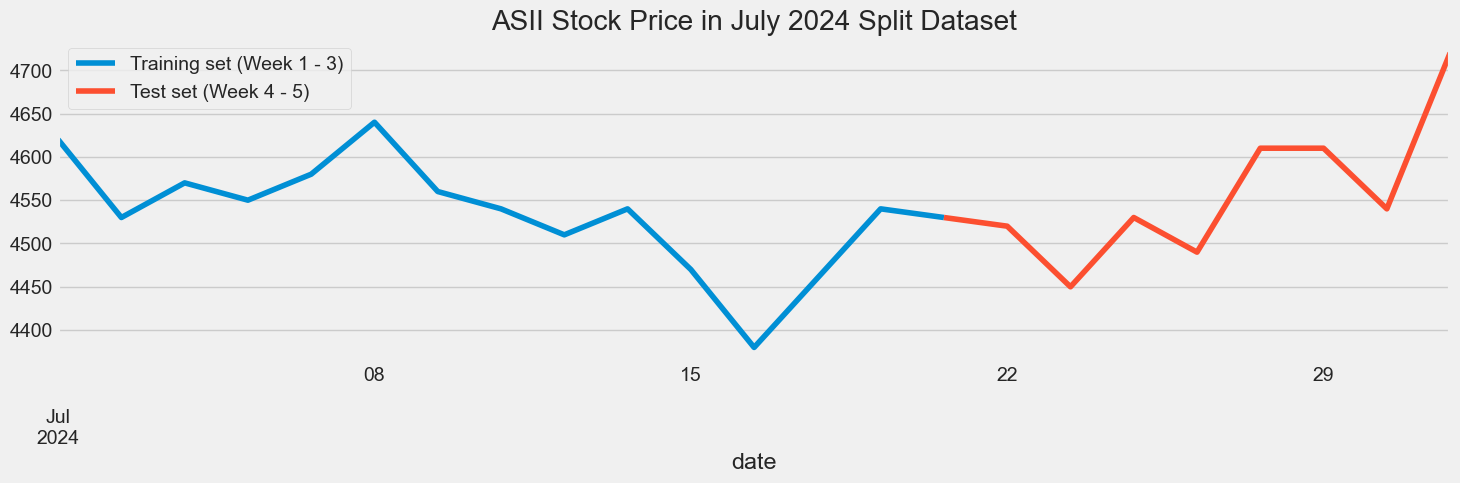

In [11]:
ASII["close"][start_date:med_date].plot(figsize=(16,4), legend=True)
ASII["close"][med_date:end_date].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Week 1 - 3)","Test set (Week 4 - 5)"])
plt.title('ASII Stock Price in July 2024 Split Dataset')
plt.show()

In [12]:
ASII_short_train = ASII[start_date:med_date].iloc[:,3:4].values
ASII_short_test = ASII[med_date:end_date].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(ASII_short_train)
len_train = len(ASII_short_train)
len_test = len(ASII_short_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
# So for each element of training set, we have 5 previous training set elements 
X_train = []
y_train = []
for i in range(5,len_train):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((ASII["close"][start_date:med_date],ASII["close"][med_date:end_date]),axis=0)
inputs = dataset_total[len(dataset_total)-len(ASII_short_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(5,len_test+5):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


15 9


Epoch 1/50

1/1 [==============================] - 19s 19s/step - loss: 0.4015
Epoch 2/50
1/1 [==============================] - 0s 98ms/step - loss: 0.3647
Epoch 3/50
1/1 [==============================] - 0s 154ms/step - loss: 0.3354
Epoch 4/50
1/1 [==============================] - 0s 91ms/step - loss: 0.3092
Epoch 5/50
1/1 [==============================] - 0s 89ms/step - loss: 0.2748
Epoch 6/50
1/1 [==============================] - 0s 74ms/step - loss: 0.2368
Epoch 7/50
1/1 [==============================] - 0s 49ms/step - loss: 0.2042
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 0.1561
Epoch 9/50
1/1 [==============================] - 0s 79ms/step - loss: 0.1383
Epoch 10/50
1/1 [==============================] - 0s 51ms/step - loss: 0.1135
Epoch 11/50
1/1 [==============================] - 0s 57ms/step - loss: 0.0974
Epoch 12/50
1/1 [==============================] - 0s 51ms/step - loss: 0.0640
Epoch 13/50
1/1 [==============================] - 0

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\3191275369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\3191275369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\3191275369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

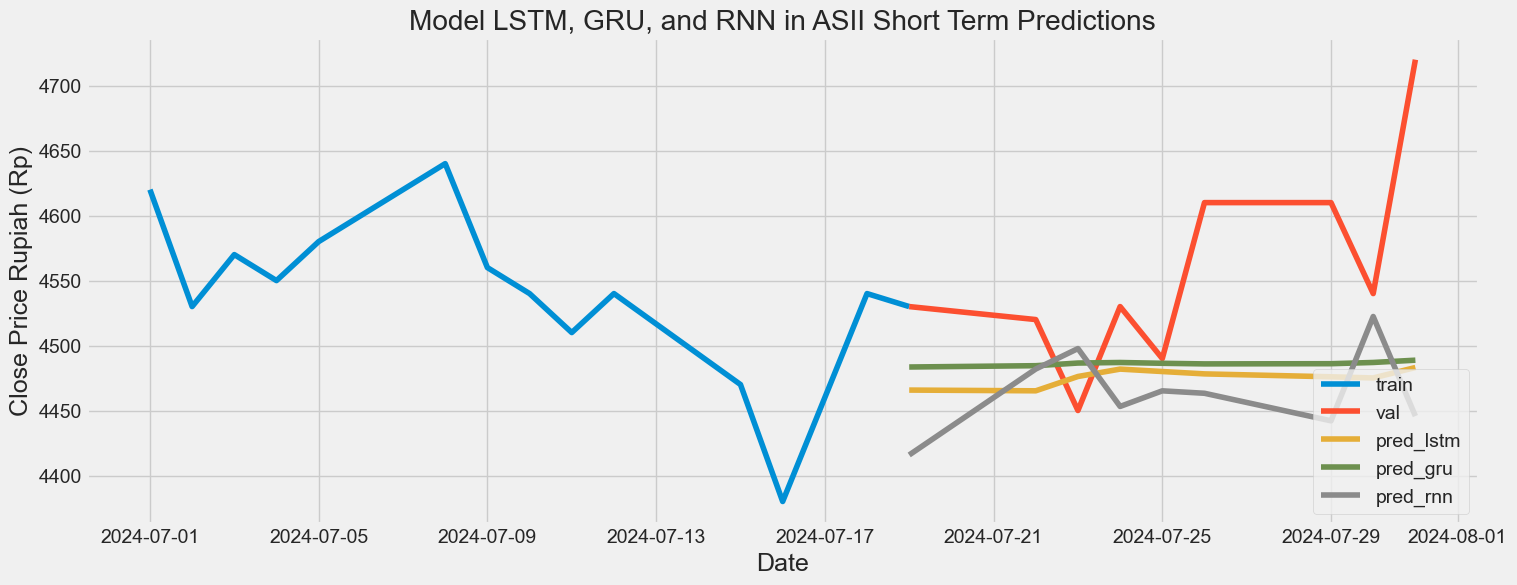

In [13]:
# Visualize the data
# Plot the data
train = ASII[start_date:med_date]
valid = ASII[med_date:end_date]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in ASII Short Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [14]:
# Evaluating the LSTM
rmse_ASII_short_LSTM = return_rmse(ASII_short_test, LSTM_predicted_stock_price)
norm_rmse_ASII_short_LSTM = return_rmse_norm(ASII_short_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_ASII_short_GRU = return_rmse(ASII_short_test, GRU_predicted_stock_price)
norm_rmse_ASII_short_GRU = return_rmse_norm(ASII_short_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_ASII_short_RNN = return_rmse(ASII_short_test, RNN_predicted_stock_price)
norm_rmse_ASII_short_RNN = return_rmse_norm(ASII_short_test, RNN_predicted_stock_price)


The root mean squared error is 55.00948728414271.
The root mean squared error after normalization is 0.39292490917244854.
The root mean squared error is 51.41078512509552.
The root mean squared error after normalization is 0.36721989375068265.
The root mean squared error is 72.92394184766954.
The root mean squared error after normalization is 0.4186496333556479.


In [15]:
#add to the table
#add result LSTM for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('short')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_ASII_short_LSTM)
dic_res['rmse_norm'].append(norm_rmse_ASII_short_LSTM)

#add result GRU for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('short')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_ASII_short_GRU)
dic_res['rmse_norm'].append(norm_rmse_ASII_short_GRU)

#add result RNN for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('short')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_ASII_short_RNN)
dic_res['rmse_norm'].append(norm_rmse_ASII_short_RNN)

In [16]:
dic_res

{'stock': ['ASII', 'ASII', 'ASII'],
 'term': ['short', 'short', 'short'],
 'algorithm': ['LSTM', 'GRU', 'RNN'],
 'rmse': [55.00948728414271, 51.41078512509552, 72.92394184766954],
 'rmse_norm': [0.39292490917244854, 0.36721989375068265, 0.4186496333556479]}

#### Long Term Prediction

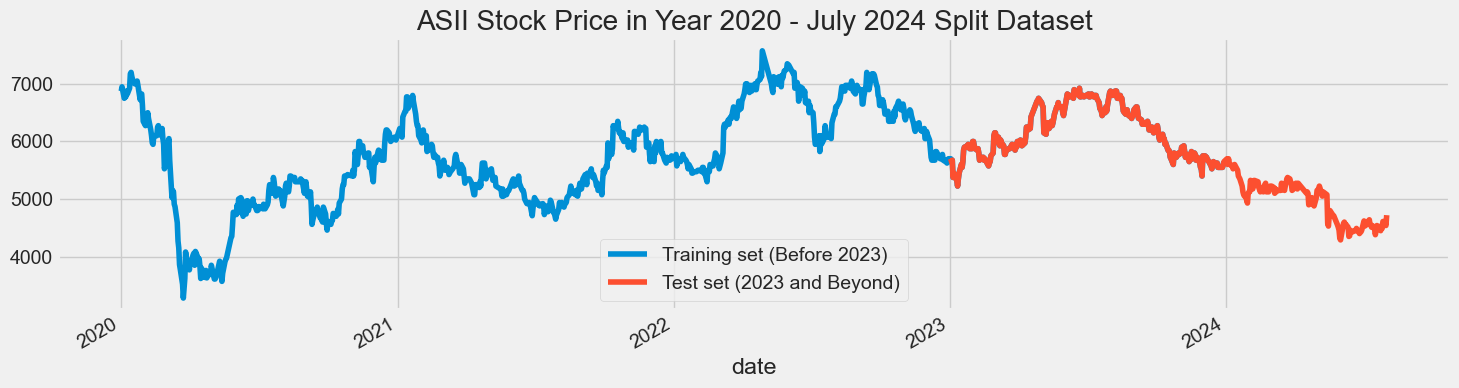

In [17]:
ASII["close"][:year].plot(figsize=(16,4), legend=True)
ASII["close"][year:].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Before 2023)","Test set (2023 and Beyond)"])
plt.title('ASII Stock Price in Year 2020 - July 2024 Split Dataset')
plt.show()

In [18]:
ASII_long_train = ASII[:year].iloc[:,3:4].values
ASII_long_test = ASII[year:].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(ASII_long_train)
len_train = len(ASII_long_train)
len_test = len(ASII_long_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,len_train):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((ASII["close"][:year],ASII["close"][year:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(ASII_long_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len_test+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


974 372
Epoch 1/50
29/29 [==============================] - 29s 141ms/step - loss: 0.0495
Epoch 2/50
29/29 [==============================] - 4s 129ms/step - loss: 0.0213
Epoch 3/50
29/29 [==============================] - 5s 189ms/step - loss: 0.0181
Epoch 4/50
29/29 [==============================] - 5s 180ms/step - loss: 0.0178
Epoch 5/50
29/29 [==============================] - 6s 220ms/step - loss: 0.0132
Epoch 6/50
29/29 [==============================] - 4s 155ms/step - loss: 0.0170
Epoch 7/50
29/29 [==============================] - 4s 121ms/step - loss: 0.0123
Epoch 8/50
29/29 [==============================] - 4s 154ms/step - loss: 0.0127
Epoch 9/50
29/29 [==============================] - 4s 139ms/step - loss: 0.0120
Epoch 10/50
29/29 [==============================] - 8s 282ms/step - loss: 0.0118
Epoch 11/50
29/29 [==============================] - 4s 132ms/step - loss: 0.0108
Epoch 12/50
29/29 [==============================] - 4s 126ms/step - loss: 0.0093
Epoch 13/50
29/2

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\2420081142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\2420081142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\2420081142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

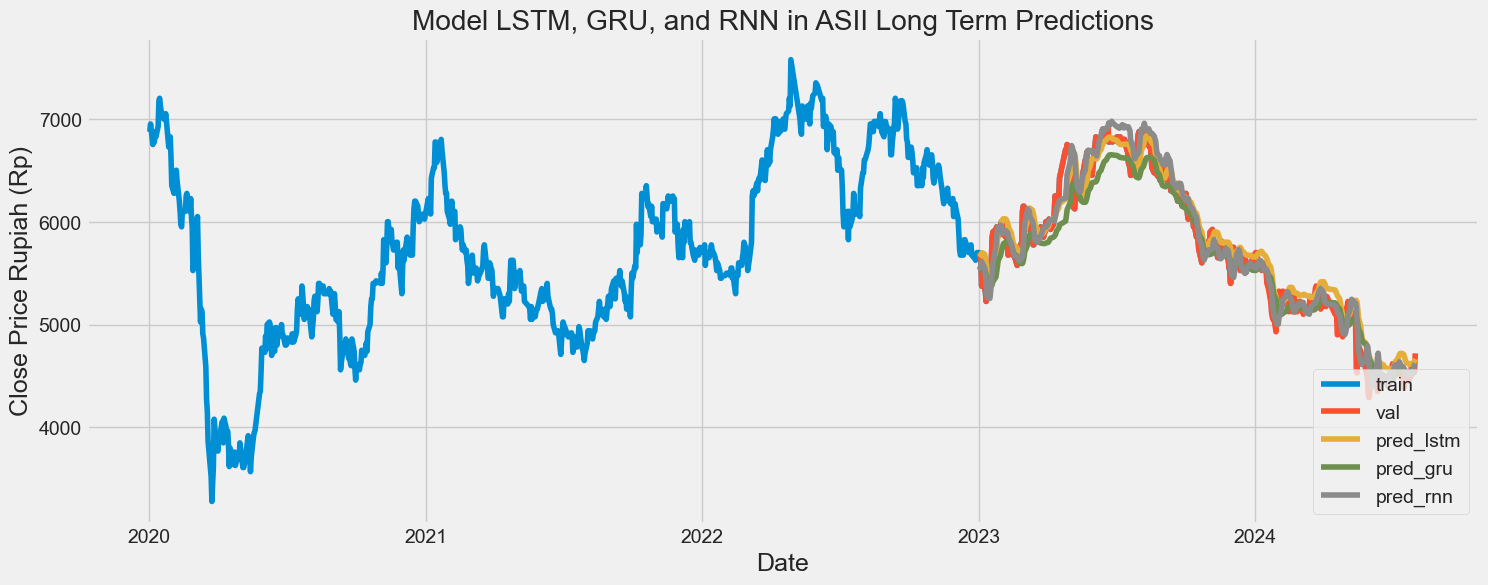

In [19]:
# Visualize the data
# Plot the data
train = ASII[:year]
valid = ASII[year:]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in ASII Long Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [20]:
# Evaluating the LSTM
rmse_ASII_long_LSTM = return_rmse(ASII_long_test, LSTM_predicted_stock_price)
norm_rmse_ASII_long_LSTM = return_rmse_norm(ASII_long_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_ASII_long_GRU = return_rmse(ASII_long_test, GRU_predicted_stock_price)
norm_rmse_ASII_long_GRU = return_rmse_norm(ASII_long_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_ASII_long_RNN = return_rmse(ASII_long_test, RNN_predicted_stock_price)
norm_rmse_ASII_long_RNN = return_rmse_norm(ASII_long_test, RNN_predicted_stock_price)


The root mean squared error is 197.5755217333279.
The root mean squared error after normalization is 0.07762084459241526.
The root mean squared error is 167.37215284412167.
The root mean squared error after normalization is 0.06602451788722748.
The root mean squared error is 163.07260452597404.
The root mean squared error after normalization is 0.06070873133266466.


In [21]:
#add to the table
#add result LSTM for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('long')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_ASII_long_LSTM)
dic_res['rmse_norm'].append(norm_rmse_ASII_long_LSTM)

#add result GRU for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('long')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_ASII_long_GRU)
dic_res['rmse_norm'].append(norm_rmse_ASII_long_GRU)

#add result RNN for ASII
dic_res['stock'].append('ASII')
dic_res['term'].append('long')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_ASII_long_RNN)
dic_res['rmse_norm'].append(norm_rmse_ASII_long_RNN)

## GOTO

#### Short Term Predictions

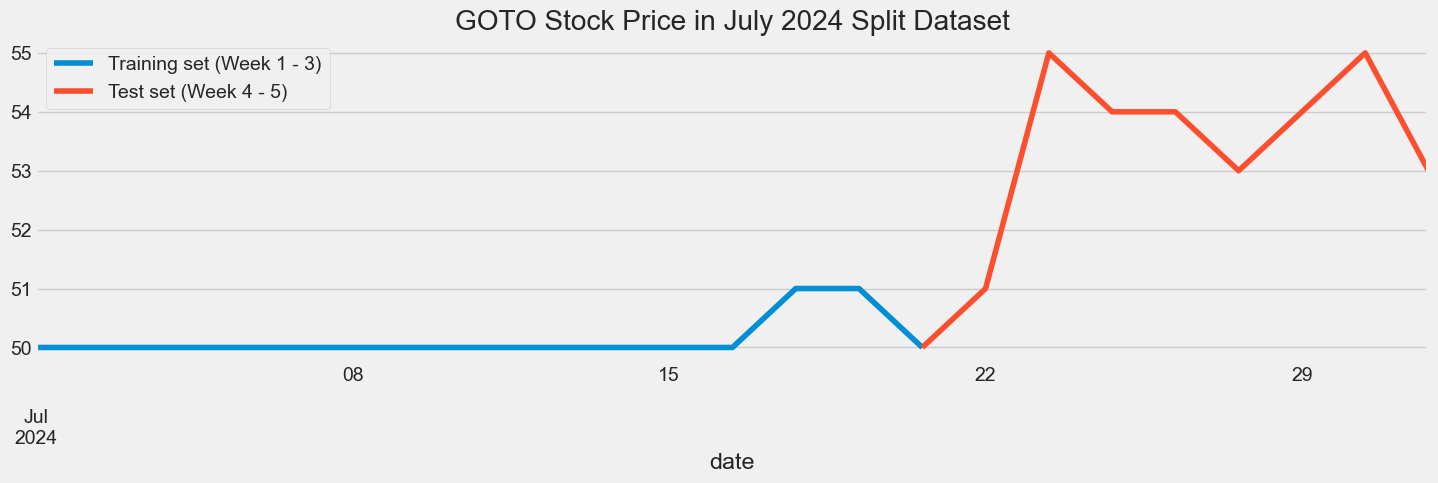

In [22]:
GOTO["close"][start_date:med_date].plot(figsize=(16,4), legend=True)
GOTO["close"][med_date:end_date].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Week 1 - 3)","Test set (Week 4 - 5)"])
plt.title('GOTO Stock Price in July 2024 Split Dataset')
plt.show()

In [23]:
GOTO_short_train = GOTO[start_date:med_date].iloc[:,3:4].values
GOTO_short_test = GOTO[med_date:end_date].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(GOTO_short_train)
len_train = len(GOTO_short_train)
len_test = len(GOTO_short_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
# So for each element of training set, we have 5 previous training set elements 
X_train = []
y_train = []
for i in range(5,len_train):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((GOTO["close"][start_date:med_date],GOTO["close"][med_date:end_date]),axis=0)
inputs = dataset_total[len(dataset_total)-len(GOTO_short_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(5,len_test+5):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


15 9
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00
Epoch 11/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0000e+00
Epoch 12/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0000e+00
Epoch 13

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\3190838348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\3190838348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\3190838348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

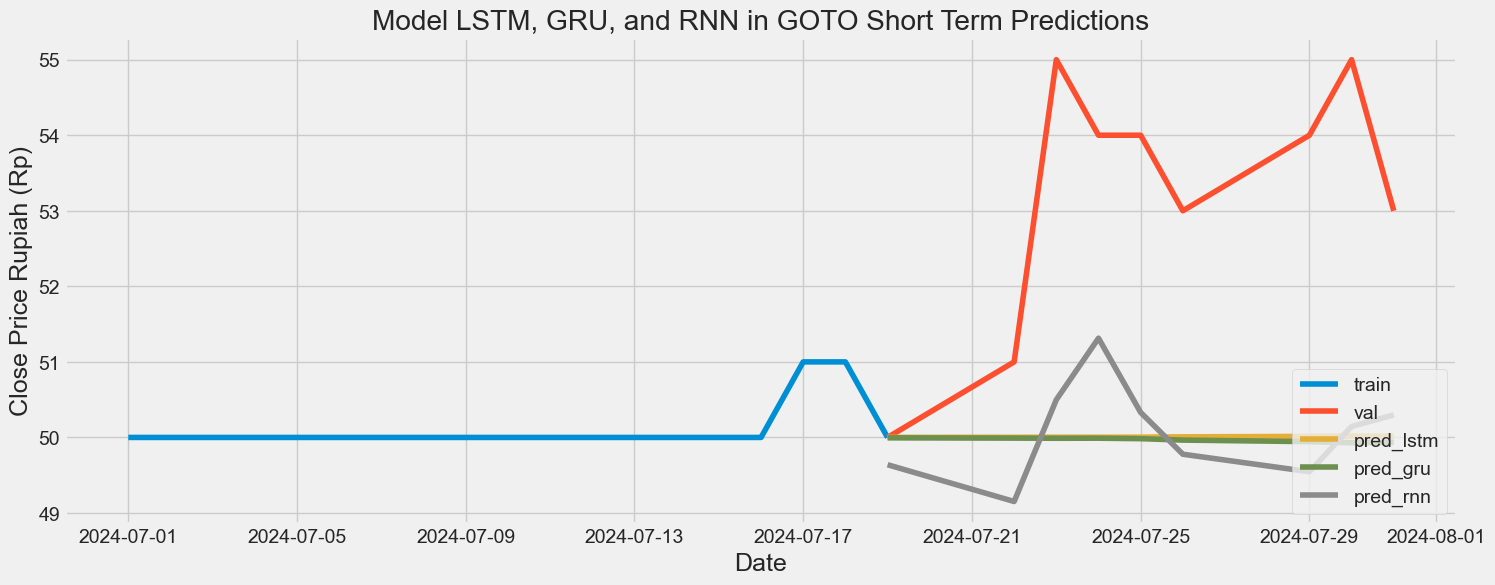

In [24]:
# Visualize the data
# Plot the data
train = GOTO[start_date:med_date]
valid = GOTO[med_date:end_date]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in GOTO Short Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [25]:
# Evaluating the LSTM
rmse_GOTO_short_LSTM = return_rmse(GOTO_short_test, LSTM_predicted_stock_price)
norm_rmse_GOTO_short_LSTM = return_rmse_norm(GOTO_short_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_GOTO_short_GRU = return_rmse(GOTO_short_test, GRU_predicted_stock_price)
norm_rmse_GOTO_short_GRU = return_rmse_norm(GOTO_short_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_GOTO_short_RNN = return_rmse(GOTO_short_test, RNN_predicted_stock_price)
norm_rmse_GOTO_short_RNN = return_rmse_norm(GOTO_short_test, RNN_predicted_stock_price)


The root mean squared error is 2.3485607668839226.
The root mean squared error after normalization is 0.7828535889613071.
The root mean squared error is 2.3901321579925154.
The root mean squared error after normalization is 0.7785089621701156.
The root mean squared error is 2.2216644652497815.
The root mean squared error after normalization is 0.5773929000990808.


In [26]:
#add to the table
#add result LSTM for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('short')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_GOTO_short_LSTM)
dic_res['rmse_norm'].append(norm_rmse_GOTO_short_LSTM)

#add result GRU for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('short')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_GOTO_short_GRU)
dic_res['rmse_norm'].append(norm_rmse_GOTO_short_GRU)

#add result RNN for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('short')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_GOTO_short_RNN)
dic_res['rmse_norm'].append(norm_rmse_GOTO_short_RNN)

#### Long Term Predictions

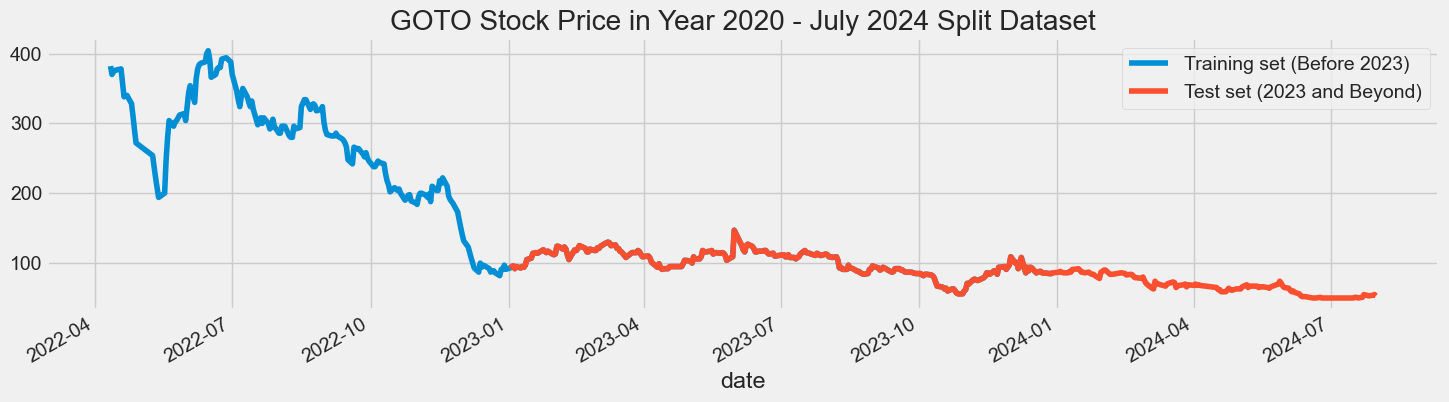

In [27]:
GOTO["close"][:year].plot(figsize=(16,4), legend=True)
GOTO["close"][year:].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Before 2023)","Test set (2023 and Beyond)"])
plt.title('GOTO Stock Price in Year 2020 - July 2024 Split Dataset')
plt.show()

In [28]:
GOTO_long_train = GOTO[:year].iloc[:,3:4].values
GOTO_long_test = GOTO[year:].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(GOTO_long_train)
len_train = len(GOTO_long_train)
len_test = len(GOTO_long_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,len_train):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((GOTO["close"][:year],GOTO["close"][year:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(GOTO_long_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len_test+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


418 372
Epoch 1/50
12/12 [==============================] - 16s 97ms/step - loss: 0.0213
Epoch 2/50
12/12 [==============================] - 1s 112ms/step - loss: 0.0103
Epoch 3/50
12/12 [==============================] - 1s 115ms/step - loss: 0.0066
Epoch 4/50
12/12 [==============================] - 1s 111ms/step - loss: 0.0098
Epoch 5/50
12/12 [==============================] - 2s 153ms/step - loss: 0.0093
Epoch 6/50
12/12 [==============================] - 2s 193ms/step - loss: 0.0064
Epoch 7/50
12/12 [==============================] - 2s 126ms/step - loss: 0.0076
Epoch 8/50
12/12 [==============================] - 1s 121ms/step - loss: 0.0059
Epoch 9/50
12/12 [==============================] - 2s 156ms/step - loss: 0.0071
Epoch 10/50
12/12 [==============================] - 4s 301ms/step - loss: 0.0045
Epoch 11/50
12/12 [==============================] - 2s 205ms/step - loss: 0.0053
Epoch 12/50
12/12 [==============================] - 1s 104ms/step - loss: 0.0071
Epoch 13/50
12/12

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\1645492680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\1645492680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\1645492680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

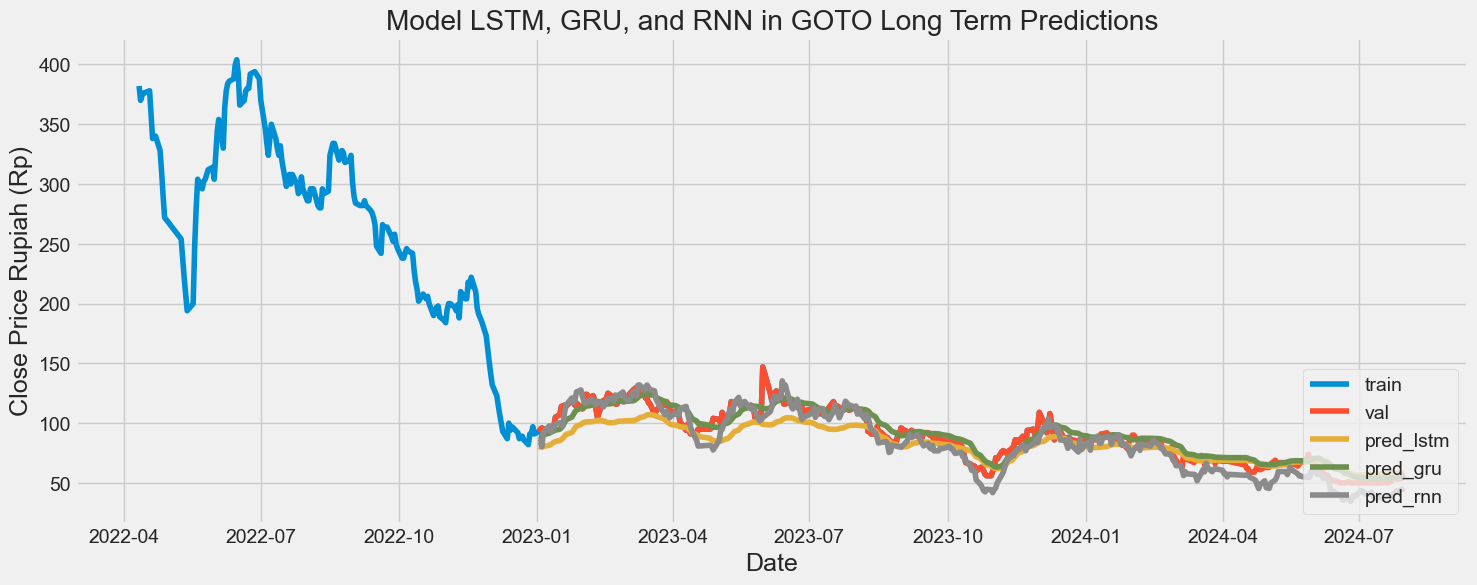

In [29]:
# Visualize the data
# Plot the data
train = GOTO[:year]
valid = GOTO[year:]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in GOTO Long Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_rnn'], loc='lower right')
plt.show()


In [30]:
# Evaluating the LSTM
rmse_GOTO_long_LSTM = return_rmse(GOTO_long_test, LSTM_predicted_stock_price)
norm_rmse_GOTO_long_LSTM = return_rmse_norm(GOTO_long_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_GOTO_long_GRU = return_rmse(GOTO_long_test, GRU_predicted_stock_price)
norm_rmse_GOTO_long_GRU = return_rmse_norm(GOTO_long_test, GRU_predicted_stock_price)
# Evaluating the sequence
rmse_GOTO_long_RNN = return_rmse(GOTO_long_test, RNN_predicted_stock_price)
norm_rmse_GOTO_long_RNN = return_rmse_norm(GOTO_long_test, RNN_predicted_stock_price)


The root mean squared error is 10.179641512203748.
The root mean squared error after normalization is 0.13050822451543267.
The root mean squared error is 7.381589976016897.
The root mean squared error after normalization is 0.09463576892329355.
The root mean squared error is 8.10699611494832.
The root mean squared error after normalization is 0.08033623230537396.


In [31]:
#add to the table
#add result LSTM for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('long')
dic_res['algorithm'].append('LSTM')
dic_res['rmse'].append(rmse_GOTO_long_LSTM)
dic_res['rmse_norm'].append(norm_rmse_GOTO_long_LSTM)

#add result GRU for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('long')
dic_res['algorithm'].append('GRU')
dic_res['rmse'].append(rmse_GOTO_long_GRU)
dic_res['rmse_norm'].append(norm_rmse_GOTO_long_GRU)

#add result RNN for GOTO
dic_res['stock'].append('GOTO')
dic_res['term'].append('long')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse_GOTO_long_RNN)
dic_res['rmse_norm'].append(norm_rmse_GOTO_long_RNN)

In [32]:
res = pd.DataFrame(dic_res)

In [45]:
res['epoch'] = 50
res['unit'] = 50
res['optimizer'] = ['rmsprop', 'sgd', 'adam', 'rmsprop', 'sgd', 'adam', 'rmsprop', 'sgd', 'adam', 'rmsprop', 'sgd', 'adam']
res['batch_size'] = [32, 150, 32, 32, 150, 32, 32, 150, 32, 32, 150, 32]

In [46]:
res

stock   term algorithm        rmse  rmse_norm  epoch  unit optimizer  \
0   ASII  short      LSTM   55.009487   0.392925     50    50   rmsprop   
1   ASII  short       GRU   51.410785   0.367220     50    50       sgd   
2   ASII  short       RNN   72.923942   0.418650     50    50      adam   
3   ASII   long      LSTM  197.575522   0.077621     50    50   rmsprop   
4   ASII   long       GRU  167.372153   0.066025     50    50       sgd   
5   ASII   long       RNN  163.072605   0.060709     50    50      adam   
6   GOTO  short      LSTM    2.348561   0.782854     50    50   rmsprop   
7   GOTO  short       GRU    2.390132   0.778509     50    50       sgd   
8   GOTO  short       RNN    2.221664   0.577393     50    50      adam   
9   GOTO   long      LSTM   10.179642   0.130508     50    50   rmsprop   
10  GOTO   long       GRU    7.381590   0.094636     50    50       sgd   
11  GOTO   long       RNN    8.106996   0.080336     50    50      adam   

    batch_size  
0           32  
1          150  
2           32  
3           32  
4          150  
5           32  
6           32  
7          150  
8           32  
9           32  
10         150  
11          32

In [47]:
res.to_csv('../result/goto-asii-long-short-baseline.csv')

## Tuning Hyperparameter
- optimizer = SGD, Adam, RMSProp
- epoch = 50, 100
- batch size =  32, 64, 128
- unit = 50, 100


### ASII

#### Short Term Predictions

In [63]:
dic_res_tuning =  {'stock' : [], 'term' : [], 'algorithm': [], 'rmse' : [], 'rmse_norm' : [], 'epoch' : [], 'unit': [], 'optimizer' : [], 'batch_size' : []}

In [91]:
def train_short(data, name, start_date, med_date, end_date, epoch, unit, batch_size, optimizer):
    rmse_LSTM, rmse_GRU, rmse_RNN, rmse_norm_LSTM, rmse_norm_GRU, rmse_norm_RNN =  short_term_train(data=ASII, name=name, start_date=start_date, med_date=med_date, end_date=end_date, epoch=50, unit=50, batch_size=32, optimizer= optimizer) 
    dic_res_tuning =  {'stock' : [], 'term' : [], 'algorithm': [], 'rmse' : [], 'rmse_norm' : [], 'epoch' : [], 'unit': [], 'optimizer' : [], 'batch_size' : []}
    dic_res_tuning['stock'].append(name)
    dic_res_tuning['term'].append('short')
    dic_res_tuning['epoch'].append(epoch)
    dic_res_tuning['unit'].append(unit)
    dic_res_tuning['optimizer'].append(optimizer)
    dic_res_tuning['batch_size'].append(32)

    dic_res_tuning['algorithm'].append('LSTM')
    dic_res_tuning['rmse'].append(rmse_LSTM)
    dic_res_tuning['rmse_norm'].append(rmse_norm_LSTM)

    dic_res_tuning['stock'].append(name)
    dic_res_tuning['term'].append('short')
    dic_res_tuning['epoch'].append(epoch)
    dic_res_tuning['unit'].append(unit)
    dic_res_tuning['optimizer'].append(optimizer)
    dic_res_tuning['batch_size'].append(32)

    dic_res_tuning['algorithm'].append('GRU')
    dic_res_tuning['rmse'].append(rmse_GRU)
    dic_res_tuning['rmse_norm'].append(rmse_norm_GRU)


    dic_res_tuning['stock'].append(name)
    dic_res_tuning['term'].append('short')
    dic_res_tuning['epoch'].append(epoch)
    dic_res_tuning['unit'].append(unit)
    dic_res_tuning['optimizer'].append(optimizer)
    dic_res_tuning['batch_size'].append(32)
    
    dic_res_tuning['algorithm'].append('RNN')
    dic_res_tuning['rmse'].append(rmse_RNN)
    dic_res_tuning['rmse_norm'].append(rmse_norm_RNN)
    
    # Make data frame of above data
    df = pd.DataFrame(dic_res_tuning)
    # append data frame to CSV file
    df.to_csv('../result tuning/result_short_tuning.csv', mode='a')
 



15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4002
Epoch 2/50
1/1 [==============================] - 0s 85ms/step - loss: 0.3559
Epoch 3/50
1/1 [==============================] - 0s 63ms/step - loss: 0.3267
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2848
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2450
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 0.1993
Epoch 7/50
1/1 [==============================] - 0s 142ms/step - loss: 0.1672
Epoch 8/50
1/1 [==============================] - 0s 131ms/step - loss: 0.1148
Epoch 9/50
1/1 [==============================] - 0s 88ms/step - loss: 0.1045
Epoch 10/50
1/1 [==============================] - 0s 95ms/step - loss: 0.1006
Epoch 11/50
1/1 [==============================] - 0s 157ms/step - loss: 0.0938
Epoch 12/50
1/1 [==============================] - 0s 63ms/step - loss: 0.0943
Epoch 13/50
1/1 [==============================] - 0s

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.62383666066193.
The root mean squared error after normalization is 0.3973131190047276.
The root mean squared error is 46.825098016186764.
The root mean squared error after normalization is 0.33446498582990486.
The root mean squared error is 64.90428542035896.
The root mean squared error after normalization is 0.4636020387168494.
15 9
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.3988
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3815
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3642
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3505
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3295
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3153
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2920
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2684
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 52.86336673482952.
The root mean squared error after normalization is 0.3775954766773537.
The root mean squared error is 50.88342637692785.
The root mean squared error after normalization is 0.3634530455494848.
The root mean squared error is 60.189074652277974.
The root mean squared error after normalization is 0.4299219618019841.
15 9
Epoch 1/50
1/1 [==============================] - 21s 21s/step - loss: 0.4038
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 0.3732
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 0.3466
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3188
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2958
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.2737
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2589
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2433
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.20023589421806.
The root mean squared error after normalization is 0.4085731135301292.
The root mean squared error is 54.34204087565575.
The root mean squared error after normalization is 0.3881574348261129.
The root mean squared error is 82.83175403440944.
The root mean squared error after normalization is 0.5227346975791268.
15 9
Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.3974
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3490
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3003
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2624
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2183
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.1735
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1522
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 0.1047
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.241925147182634.
The root mean squared error after normalization is 0.3945851796227339.
The root mean squared error is 56.88608561319644.
The root mean squared error after normalization is 0.4052648538674113.
The root mean squared error is 78.31900298747009.
The root mean squared error after normalization is 0.4851395347492706.
15 9
Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.4055
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3888
Epoch 3/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3736
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3577
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3414
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3232
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3059
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2852
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.90674314436117.
The root mean squared error after normalization is 0.38504816531686537.
The root mean squared error is 50.27701257553099.
The root mean squared error after normalization is 0.3591215183966494.
The root mean squared error is 64.15849483749774.
The root mean squared error after normalization is 0.4487619363082921.
15 9
Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.3949
Epoch 2/50
1/1 [==============================] - 0s 115ms/step - loss: 0.3643
Epoch 3/50
1/1 [==============================] - 0s 47ms/step - loss: 0.3336
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3102
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2842
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.2681
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 0.2511
Epoch 8/50
1/1 [==============================] - 0s 59ms/step - loss: 0.2382
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 56.83546285261391.
The root mean squared error after normalization is 0.40596759180438524.
The root mean squared error is 54.16728504854961.
The root mean squared error after normalization is 0.3869091789182109.
The root mean squared error is 71.44017389680864.
The root mean squared error after normalization is 0.46920229916897244.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3966
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3500
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3083
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2716
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2193
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1981
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1422
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 0.1103
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.114681481732.
The root mean squared error after normalization is 0.3936762962980862.
The root mean squared error is 47.269922267024164.
The root mean squared error after normalization is 0.33764230190731565.
The root mean squared error is 76.5279810738522.
The root mean squared error after normalization is 0.49597724450001557.
15 9
Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.3967
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3788
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3610
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3413
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3218
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2998
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2774
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2514
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.37532177801886.
The root mean squared error after normalization is 0.3883951555572784.
The root mean squared error is 51.45709485044994.
The root mean squared error after normalization is 0.36755067750321546.
The root mean squared error is 68.66063638205907.
The root mean squared error after normalization is 0.4904331170147069.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4016
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3781
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3519
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3287
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3095
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2883
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2727
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2575
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 59.26881455892573.
The root mean squared error after normalization is 0.4233486754208979.
The root mean squared error is 54.20588798905923.
The root mean squared error after normalization is 0.38718491420756573.
The root mean squared error is 55.78767198031865.
The root mean squared error after normalization is 0.3984833712879906.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.4021
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 0.3616
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 0.3327
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 0.2968
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 0.2694
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2364
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 0.2030
Epoch 8/50
1/1 [==============================] - 0s 57ms/step - loss: 0.1579
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.77478444967436.
The root mean squared error after normalization is 0.3841056032119595.
The root mean squared error is 51.142780658809.
The root mean squared error after normalization is 0.36530557613435083.
The root mean squared error is 73.44606068975362.
The root mean squared error after normalization is 0.46621723777597934.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.3985
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3809
Epoch 3/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3642
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3432
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3261
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3032
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2813
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2616
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.20834184794406.
The root mean squared error after normalization is 0.3800595846281718.
The root mean squared error is 54.01472363737421.
The root mean squared error after normalization is 0.3858194545526732.
The root mean squared error is 63.34179294496474.
The root mean squared error after normalization is 0.45244137817831925.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.3983
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3724
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3467
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3241
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3048
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2852
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2599
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2455
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 58.14064737262732.
The root mean squared error after normalization is 0.4152903383759096.
The root mean squared error is 54.73492355717921.
The root mean squared error after normalization is 0.39096373969413745.
The root mean squared error is 68.06471406939406.
The root mean squared error after normalization is 0.48617652906709957.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4017
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3615
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3313
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3010
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2562
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2218
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1846
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 0.1425
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 56.33850804051931.
The root mean squared error after normalization is 0.4024179145751373.
The root mean squared error is 48.15966376432712.
The root mean squared error after normalization is 0.3439975983166219.
The root mean squared error is 87.4214569665124.
The root mean squared error after normalization is 0.5086079230818233.
15 9
Epoch 1/50
1/1 [==============================] - 21s 21s/step - loss: 0.4016
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3790
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3597
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3412
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3171
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3083
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2746
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2434
Epoch 9/5

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.81345793811039.
The root mean squared error after normalization is 0.3986675567007883.
The root mean squared error is 50.643238832317834.
The root mean squared error after normalization is 0.36173742023084166.
The root mean squared error is 80.02973496115519.
The root mean squared error after normalization is 0.5296984942956593.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4009
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3695
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3427
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 0.3162
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2927
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2728
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2526
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2449
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.24060849031607.
The root mean squared error after normalization is 0.4088614892165436.
The root mean squared error is 53.96029889345121.
The root mean squared error after normalization is 0.38543070638179433.
The root mean squared error is 61.4999302729717.
The root mean squared error after normalization is 0.4251553834748674.
15 9
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.3954
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3574
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3312
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2914
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2505
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2273
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 0.1787
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1627
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.47667148557972.
The root mean squared error after normalization is 0.38911908203985557.
The root mean squared error is 49.96011761577605.
The root mean squared error after normalization is 0.3568579829698278.
The root mean squared error is 80.11399695155747.
The root mean squared error after normalization is 0.5632012088190412.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3837
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3688
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3519
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3348
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3147
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2966
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2727
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.64229780271597.
The root mean squared error after normalization is 0.3903021271622577.
The root mean squared error is 53.64339725605028.
The root mean squared error after normalization is 0.3831671232575016.
The root mean squared error is 76.69086554653.
The root mean squared error after normalization is 0.3932352874708162.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.3982
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3733
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3503
Epoch 4/50
1/1 [==============================] - 0s 27ms/step - loss: 0.3285
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3084
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2906
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2720
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2622
Epoch 9/50


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 59.61815502299406.
The root mean squared error after normalization is 0.4258439644499582.
The root mean squared error is 54.172266031526455.
The root mean squared error after normalization is 0.3869447573680459.
The root mean squared error is 47.81649869626941.
The root mean squared error after normalization is 0.34154641925906765.
15 9
Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.4023
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3570
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3230
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2925
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2448
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2135
Epoch 7/50
1/1 [==============================] - 0s 27ms/step - loss: 0.1679
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 0.1303
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 56.11790719133509.
The root mean squared error after normalization is 0.4008421942238227.
The root mean squared error is 49.48361940151323.
The root mean squared error after normalization is 0.35345442429652263.
The root mean squared error is 53.056360539586954.
The root mean squared error after normalization is 0.37897400385419205.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4040
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3839
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3652
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3474
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3284
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3026
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2813
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2634
Epoch

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.31715464062112.
The root mean squared error after normalization is 0.3879796760044372.
The root mean squared error is 50.12717084102656.
The root mean squared error after normalization is 0.3580512202930477.
The root mean squared error is 53.13083460463342.
The root mean squared error after normalization is 0.37950596146166793.
15 9
Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 0.3965
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3683
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3425
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3192
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2951
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 0.2781
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2632
Epoch 8/50
1/1 [==============================] - 0s 59ms/step - loss: 0.2455
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.881424786648495.
The root mean squared error after normalization is 0.41343874847606044.
The root mean squared error is 54.004474992384274.
The root mean squared error after normalization is 0.3857462499456026.
The root mean squared error is 41.4562799053831.
The root mean squared error after normalization is 0.29611628503845.
15 9
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.4049
Epoch 2/50
1/1 [==============================] - 0s 77ms/step - loss: 0.3652
Epoch 3/50
1/1 [==============================] - 0s 54ms/step - loss: 0.3335
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3152
Epoch 5/50
1/1 [==============================] - 0s 37ms/step - loss: 0.2703
Epoch 6/50
1/1 [==============================] - 0s 63ms/step - loss: 0.2407
Epoch 7/50
1/1 [==============================] - 0s 57ms/step - loss: 0.1967
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1591
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 56.01054135895699.
The root mean squared error after normalization is 0.4000752954211218.
The root mean squared error is 48.9130963528614.
The root mean squared error after normalization is 0.34937925966329525.
The root mean squared error is 72.63163983345521.
The root mean squared error after normalization is 0.5187974273818217.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3992
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3807
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3624
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3459
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3226
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3003
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2823
Epoch 8/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2595
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.25375116520109.
The root mean squared error after normalization is 0.3803839368942933.
The root mean squared error is 50.761702757591465.
The root mean squared error after normalization is 0.3625835911256537.
The root mean squared error is 70.17422859712562.
The root mean squared error after normalization is 0.5012444899794685.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4009
Epoch 2/50
1/1 [==============================] - 0s 54ms/step - loss: 0.3766
Epoch 3/50
1/1 [==============================] - 0s 54ms/step - loss: 0.3536
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3332
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 0.3154
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2925
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.2764
Epoch 8/50
1/1 [==============================] - 0s 64ms/step - loss: 0.2592
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 59.43968026875278.
The root mean squared error after normalization is 0.4245691447768053.
The root mean squared error is 53.69707995952107.
The root mean squared error after normalization is 0.3835505711394359.
The root mean squared error is 62.489681905779044.
The root mean squared error after normalization is 0.4463548707555641.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4054
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3614
Epoch 3/50
1/1 [==============================] - 0s 58ms/step - loss: 0.3261
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 0.2941
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2473
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2263
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1856
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1488
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.1960421302267.
The root mean squared error after normalization is 0.39425744378733474.
The root mean squared error is 50.38928150656437.
The root mean squared error after normalization is 0.3599234393326026.
The root mean squared error is 48.31719727797767.
The root mean squared error after normalization is 0.3451228376998402.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4004
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3847
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3680
Epoch 4/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3522
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3365
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3171
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2985
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2764
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.9289123156717.
The root mean squared error after normalization is 0.38520651654051125.
The root mean squared error is 52.504504702580576.
The root mean squared error after normalization is 0.3750321764470041.
The root mean squared error is 77.56841296420215.
The root mean squared error after normalization is 0.456841137387806.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3985
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3709
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3449
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3240
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2992
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2763
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2637
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2439
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 58.013017557868444.
The root mean squared error after normalization is 0.41437869684191797.
The root mean squared error is 53.40461310768795.
The root mean squared error after normalization is 0.3814615221977712.
The root mean squared error is 55.69894992233104.
The root mean squared error after normalization is 0.3978496423023648.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4016
Epoch 2/50
1/1 [==============================] - 0s 53ms/step - loss: 0.3615
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3319
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2949
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.2520
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2180
Epoch 7/50
1/1 [==============================] - 0s 42ms/step - loss: 0.1759
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1513
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.42559342628114.
The root mean squared error after normalization is 0.3887542387591514.
The root mean squared error is 54.88743567275098.
The root mean squared error after normalization is 0.39205311194822273.
The root mean squared error is 52.7090105204247.
The root mean squared error after normalization is 0.37649293228874753.
15 9
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.3992
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 0.3826
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3687
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3506
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 0.3371
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3204
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2945
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2685
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.41288183251481.
The root mean squared error after normalization is 0.38866344166082006.
The root mean squared error is 53.62219172981336.
The root mean squared error after normalization is 0.38301565521295305.
The root mean squared error is 64.12433829058062.
The root mean squared error after normalization is 0.4580309877898614.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.4028
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3732
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3472
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3255
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3048
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2818
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2704
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2493
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 58.161039306328156.
The root mean squared error after normalization is 0.41543599504520135.
The root mean squared error is 54.733400226121184.
The root mean squared error after normalization is 0.3909528587580087.
The root mean squared error is 54.222138562370255.
The root mean squared error after normalization is 0.38730098973121496.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3943
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3463
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3039
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2619
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2196
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.1645
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.1360
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 0.1089
Epo

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.817831598597834.
The root mean squared error after normalization is 0.39155593998998395.
The root mean squared error is 52.91669883376618.
The root mean squared error after normalization is 0.37797642024118777.
The root mean squared error is 74.39938884461874.
The root mean squared error after normalization is 0.5314242060329916.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4036
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3865
Epoch 3/50
1/1 [==============================] - 0s 50ms/step - loss: 0.3689
Epoch 4/50
1/1 [==============================] - 0s 52ms/step - loss: 0.3514
Epoch 5/50
1/1 [==============================] - 0s 72ms/step - loss: 0.3293
Epoch 6/50
1/1 [==============================] - 0s 52ms/step - loss: 0.3070
Epoch 7/50
1/1 [==============================] - 0s 107ms/step - loss: 0.2787
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2658
Epoc

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 54.58686413253021.
The root mean squared error after normalization is 0.3899061723752157.
The root mean squared error is 50.002312626603086.
The root mean squared error after normalization is 0.357159375904307.
The root mean squared error is 48.71676345052772.
The root mean squared error after normalization is 0.3479768817894837.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.3973
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3692
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3422
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3174
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2972
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2789
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2615
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2441
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.33357603761956.
The root mean squared error after normalization is 0.4095255431258545.
The root mean squared error is 53.25244105056618.
The root mean squared error after normalization is 0.3803745789326164.
The root mean squared error is 53.81122169054423.
The root mean squared error after normalization is 0.38436586921817273.
15 9
Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 0.4019
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3611
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3282
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2972
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2609
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2218
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.1863
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 0.1435
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.59582798843342.
The root mean squared error after normalization is 0.4113987713459533.
The root mean squared error is 47.25012397553619.
The root mean squared error after normalization is 0.3375008855395455.
The root mean squared error is 62.01599545436387.
The root mean squared error after normalization is 0.44297139610259917.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4029
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3881
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 0.3712
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3558
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3373
Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3229
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3006
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2759
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.11000100457347.
The root mean squared error after normalization is 0.39364286431838164.
The root mean squared error is 56.66572440453241.
The root mean squared error after normalization is 0.404755174318089.
The root mean squared error is 62.24801068125396.
The root mean squared error after normalization is 0.41886588317986645.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.3980
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3743
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3523
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3316
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3156
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3004
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2830
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2660
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 60.50229954925066.
The root mean squared error after normalization is 0.4321592824946475.
The root mean squared error is 53.35319688961554.
The root mean squared error after normalization is 0.3810942634972547.
The root mean squared error is 61.035350306766155.
The root mean squared error after normalization is 0.43596678790547233.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.4038
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3612
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3324
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2964
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2578
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2290
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 0.1871
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.1391
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.26920796337439.
The root mean squared error after normalization is 0.40906577116696036.
The root mean squared error is 48.57542525414135.
The root mean squared error after normalization is 0.3469673232438675.
The root mean squared error is 101.79985752819171.
The root mean squared error after normalization is 0.46600216860285354.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4048
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3871
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3707
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 0.3598
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3411
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3271
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3035
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2806
Epoch

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.17298503430377.
The root mean squared error after normalization is 0.3798070359593129.
The root mean squared error is 52.98342790066212.
The root mean squared error after normalization is 0.37845305643330124.
The root mean squared error is 68.51126785971425.
The root mean squared error after normalization is 0.40914892246524054.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3972
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3659
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3376
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 0.3119
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2893
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2719
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 0.2525
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2373
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 56.77454815250873.
The root mean squared error after normalization is 0.40553248680363413.
The root mean squared error is 54.4528990471006.
The root mean squared error after normalization is 0.3889492789078618.
The root mean squared error is 65.17615628620906.
The root mean squared error after normalization is 0.44086378178278723.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4016
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3596
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 0.3209
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2910
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2559
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2132
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1666
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 0.1283
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 56.21607810190267.
The root mean squared error after normalization is 0.4015434150135905.
The root mean squared error is 47.7119709119032.
The root mean squared error after normalization is 0.34079979222788065.
The root mean squared error is 81.84975905027237.
The root mean squared error after normalization is 0.4303701342111078.
15 9
Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 0.4060
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3883
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3678
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3534
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3325
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3132
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2960
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2666
Epoch 9/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 52.4434296846322.
The root mean squared error after normalization is 0.3745959263188004.
The root mean squared error is 51.860420853756345.
The root mean squared error after normalization is 0.3704315775268317.
The root mean squared error is 51.599303628701776.
The root mean squared error after normalization is 0.3685664544907265.
15 9
Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 0.3971
Epoch 2/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3698
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3453
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.3208
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3006
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.2832
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2670
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2483
Epoch 9

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.968846704037354.
The root mean squared error after normalization is 0.4140631907431241.
The root mean squared error is 53.67280681257172.
The root mean squared error after normalization is 0.38337719151836913.
The root mean squared error is 67.85766742117532.
The root mean squared error after normalization is 0.4711986508119344.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.3975
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 0.3459
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3009
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 0.2624
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 0.2238
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.1611
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 0.1277
Epoch 8/50
1/1 [==============================] - 0s 37ms/step - loss: 0.1041
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 55.36095232894801.
The root mean squared error after normalization is 0.39543537377820015.
The root mean squared error is 51.80870789416066.
The root mean squared error after normalization is 0.37006219924400546.
The root mean squared error is 67.92613161790456.
The root mean squared error after normalization is 0.4851866544136034.
15 9
Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.4011
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3851
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3740
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3581
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3391
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3221
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3134
Epoch 8/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2922
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 53.27214223456853.
The root mean squared error after normalization is 0.3805153016754896.
The root mean squared error is 48.828078046852426.
The root mean squared error after normalization is 0.34877198604894566.
The root mean squared error is 54.61795320384734.
The root mean squared error after normalization is 0.3901282371703393.
15 9
Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 0.4016
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.3752
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3505
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3271
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3062
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 0.2914
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2679
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2582
Epoch 

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 58.86771160326404.
The root mean squared error after normalization is 0.42048365430902934.
The root mean squared error is 54.896731450493185.
The root mean squared error after normalization is 0.39211951036066556.
The root mean squared error is 66.24799513392367.
The root mean squared error after normalization is 0.47319996524231317.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.4009
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3601
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3253
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2865
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2573
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2172
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 0.1641
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 0.1298
Epoc

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 52.652331310118896.
The root mean squared error after normalization is 0.37608808078656447.
The root mean squared error is 51.090131371096646.
The root mean squared error after normalization is 0.36492950979354744.
The root mean squared error is 65.8729144153691.
The root mean squared error after normalization is 0.34181200333095796.
15 9
Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.4046
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3882
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3766
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3626
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3467
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3271
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 0.3182
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 0.3001
Epoc

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 51.94231287041551.
The root mean squared error after normalization is 0.37101652050296824.
The root mean squared error is 50.94481184551447.
The root mean squared error after normalization is 0.36389151318224694.
The root mean squared error is 49.29317604988235.
The root mean squared error after normalization is 0.35209411464201806.
15 9
Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.3983
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3682
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3449
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3228
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2972
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.2788
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 0.2566
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2489
Epoch

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_19064\8162379.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

The root mean squared error is 57.55893331461419.
The root mean squared error after normalization is 0.4111352379615301.
The root mean squared error is 53.57136989128088.
The root mean squared error after normalization is 0.3826526420805775.
The root mean squared error is 81.90810288143828.
The root mean squared error after normalization is 0.5109355183320459.


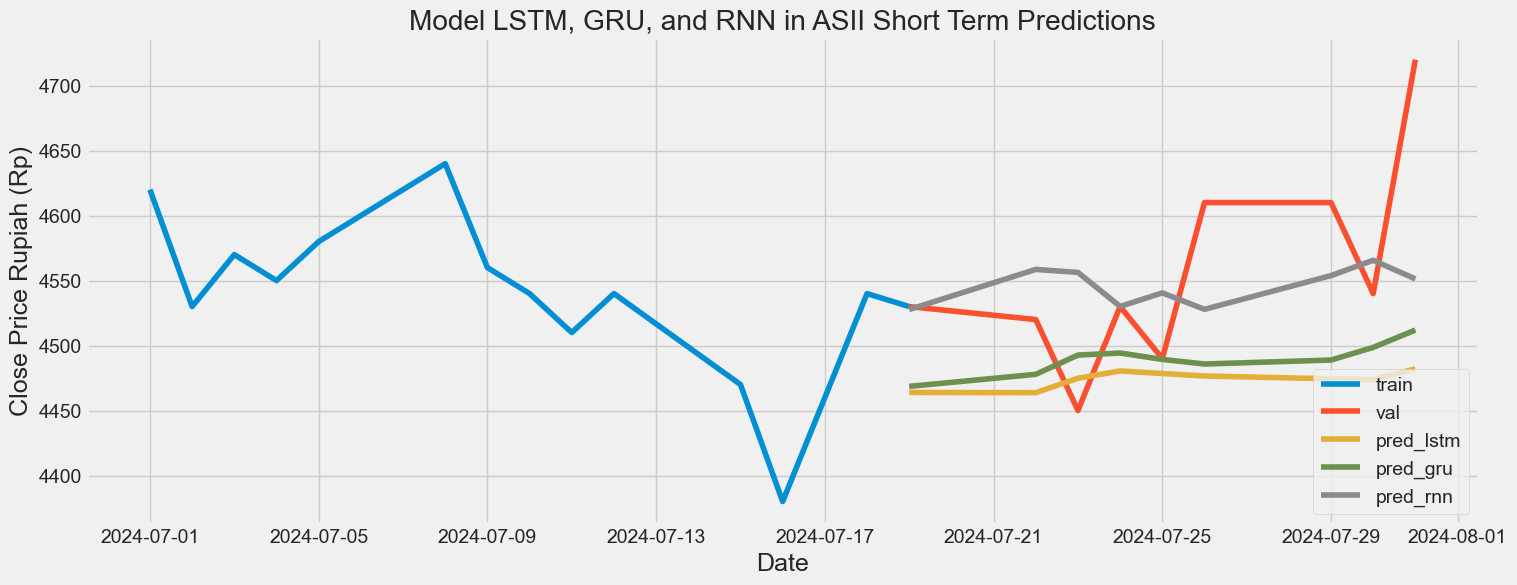

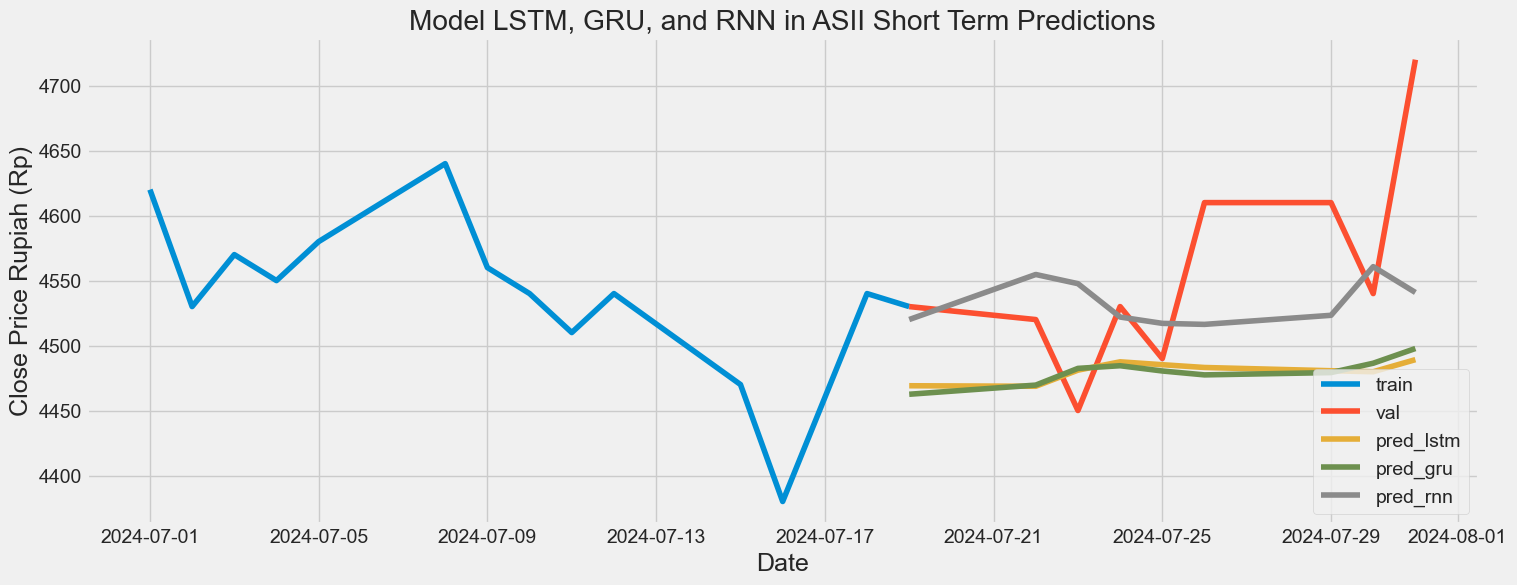

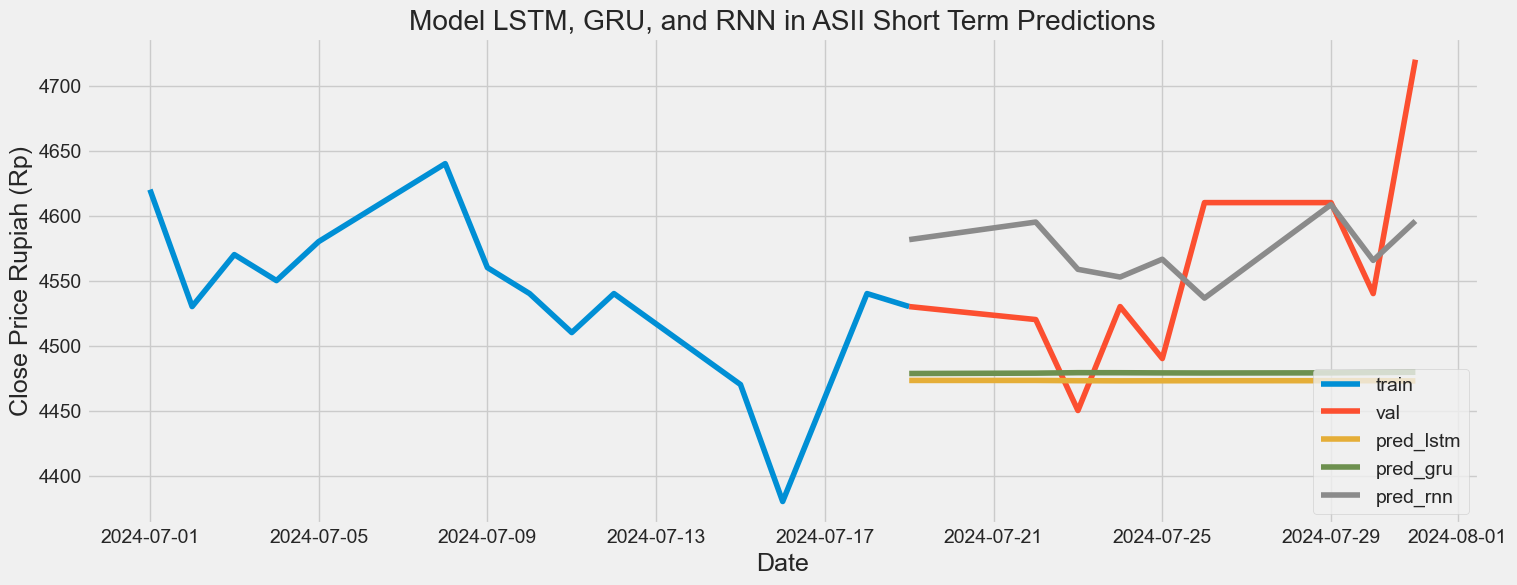

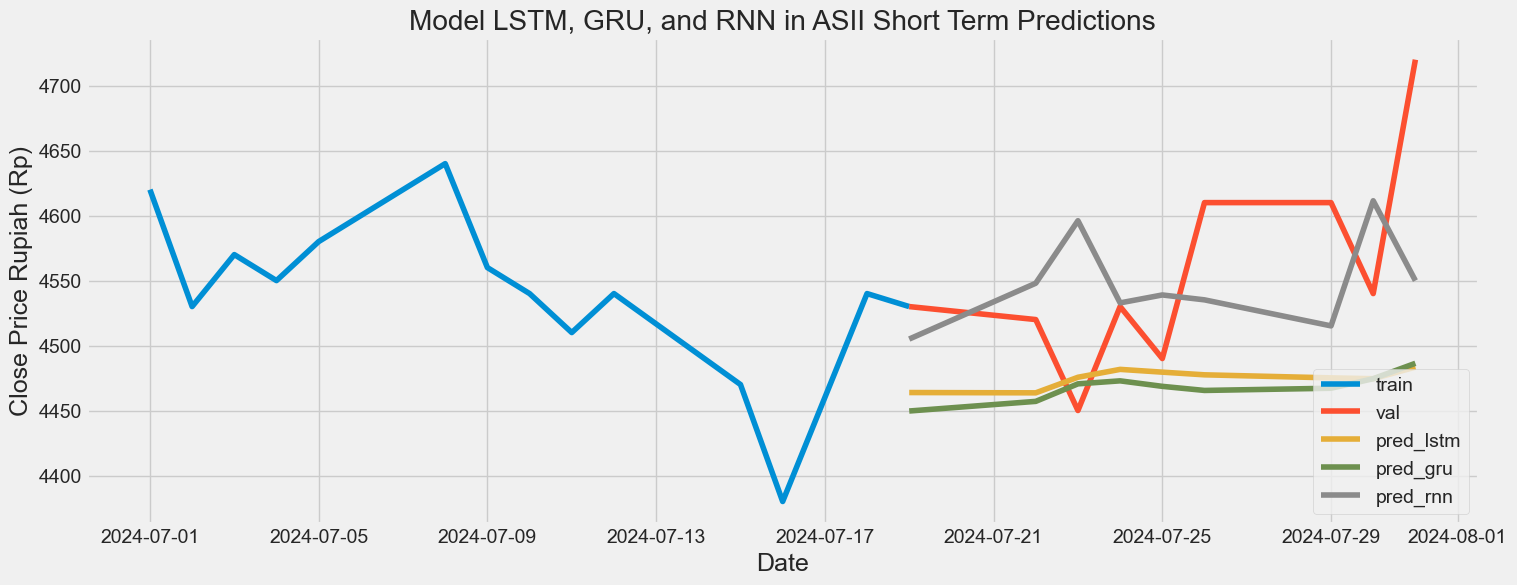

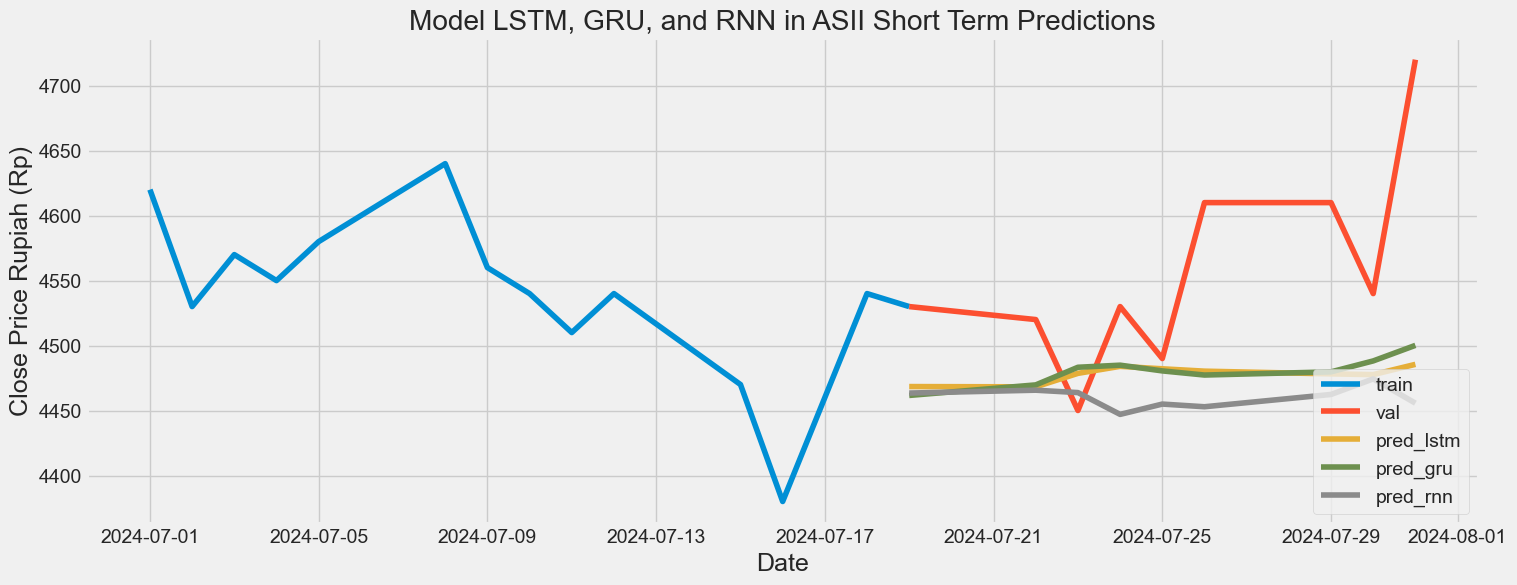

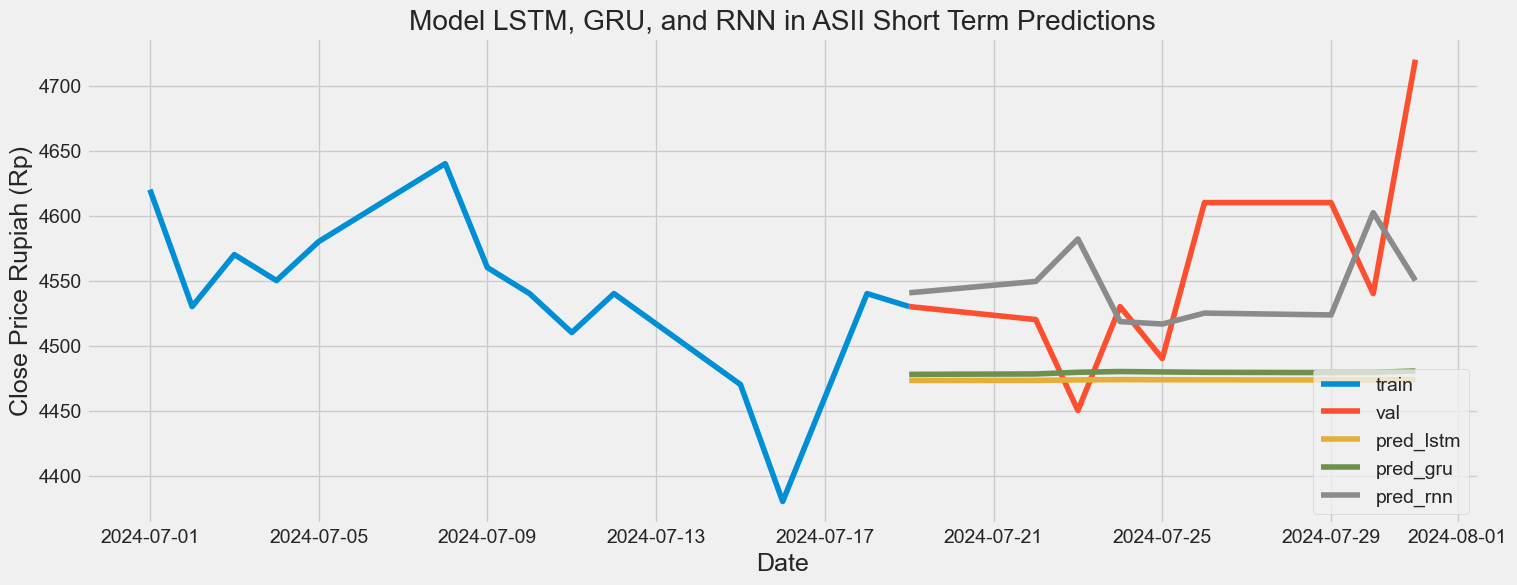

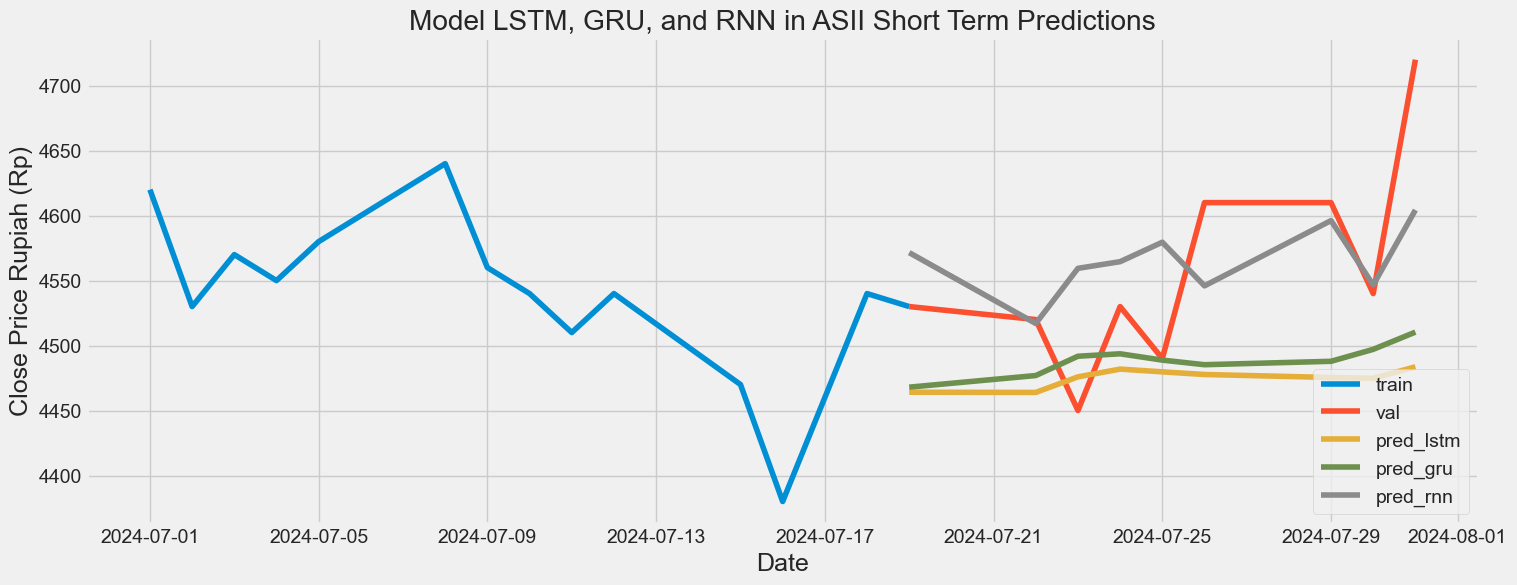

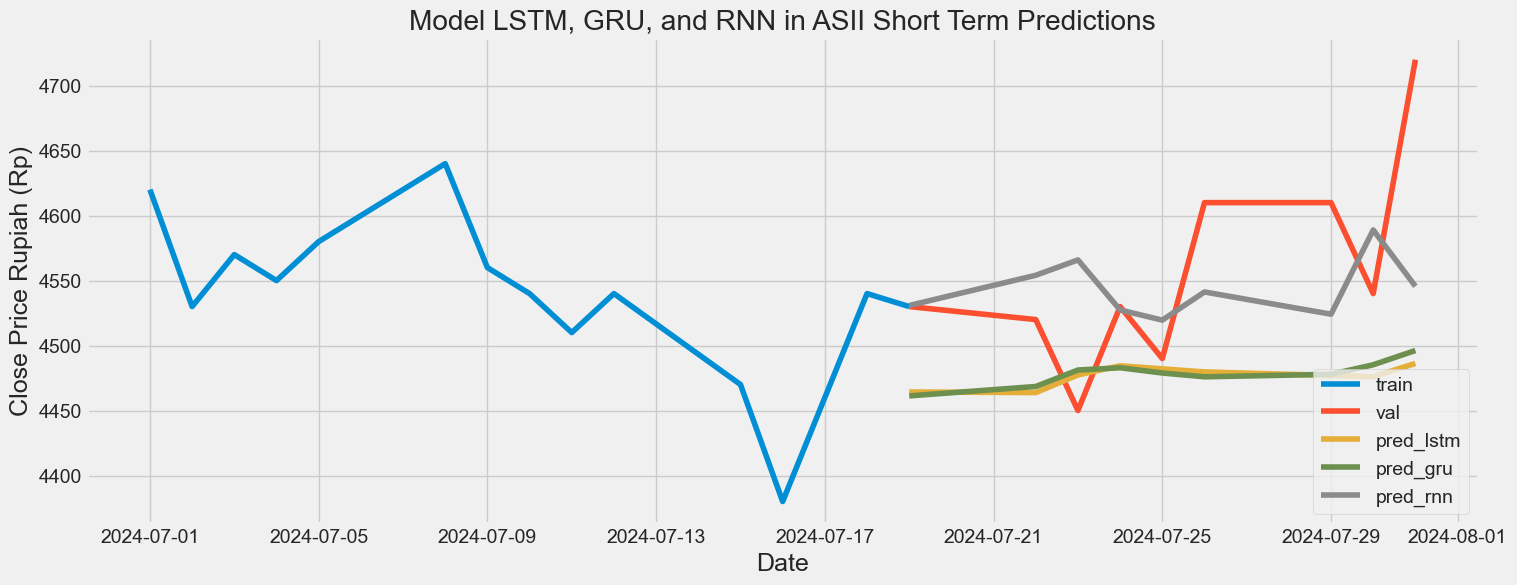

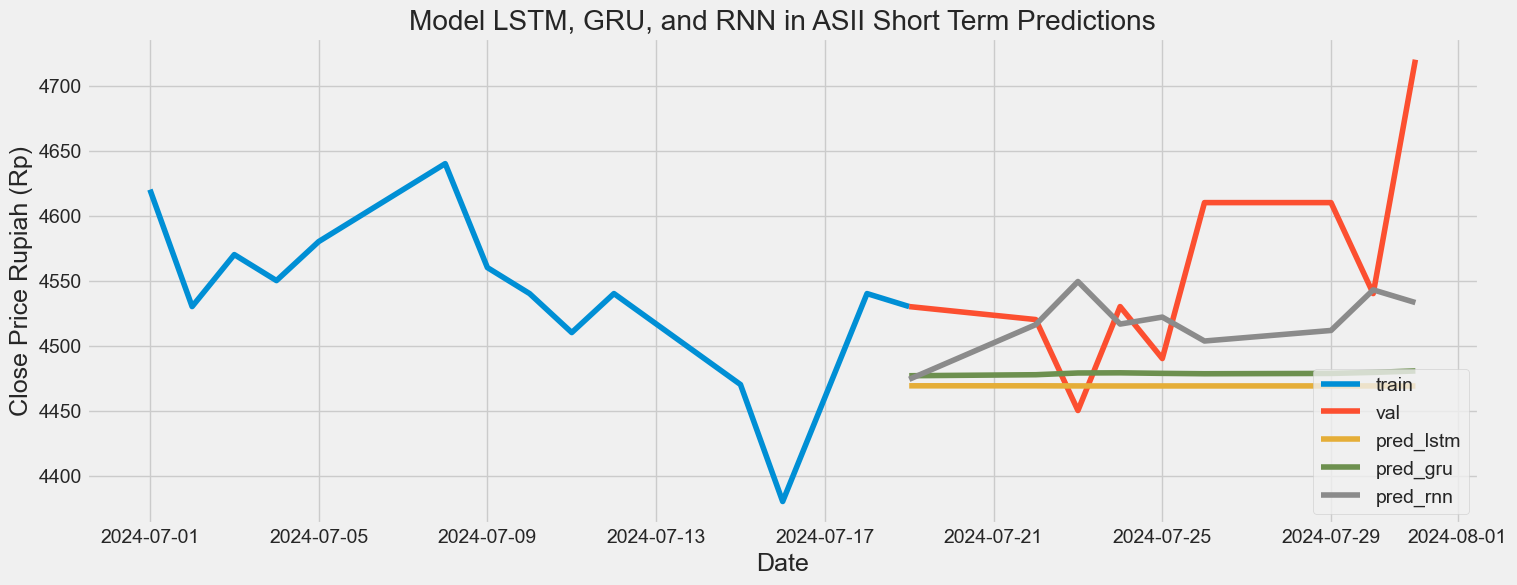

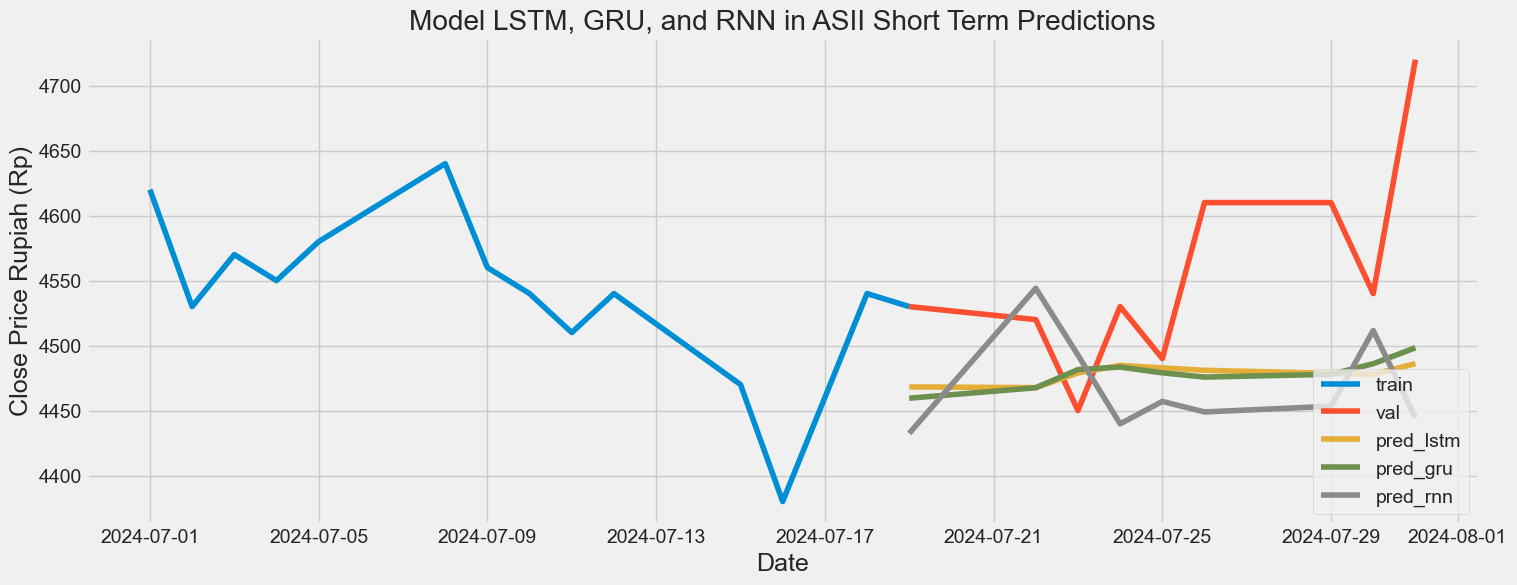

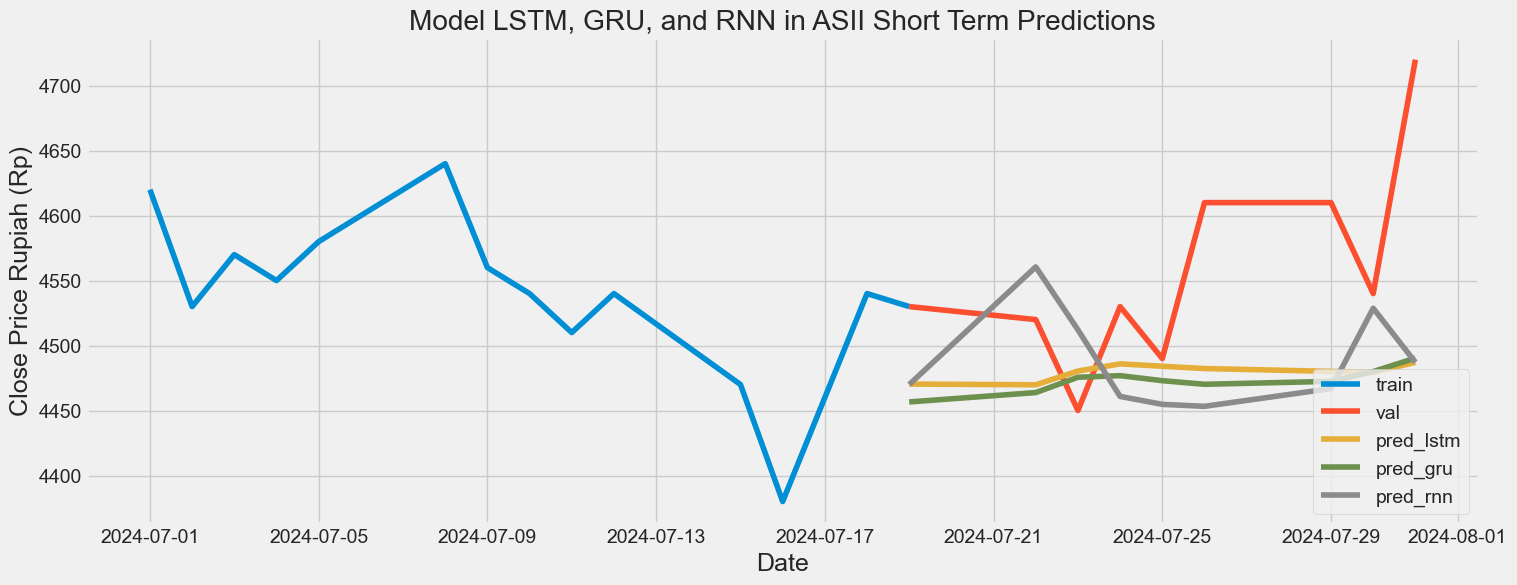

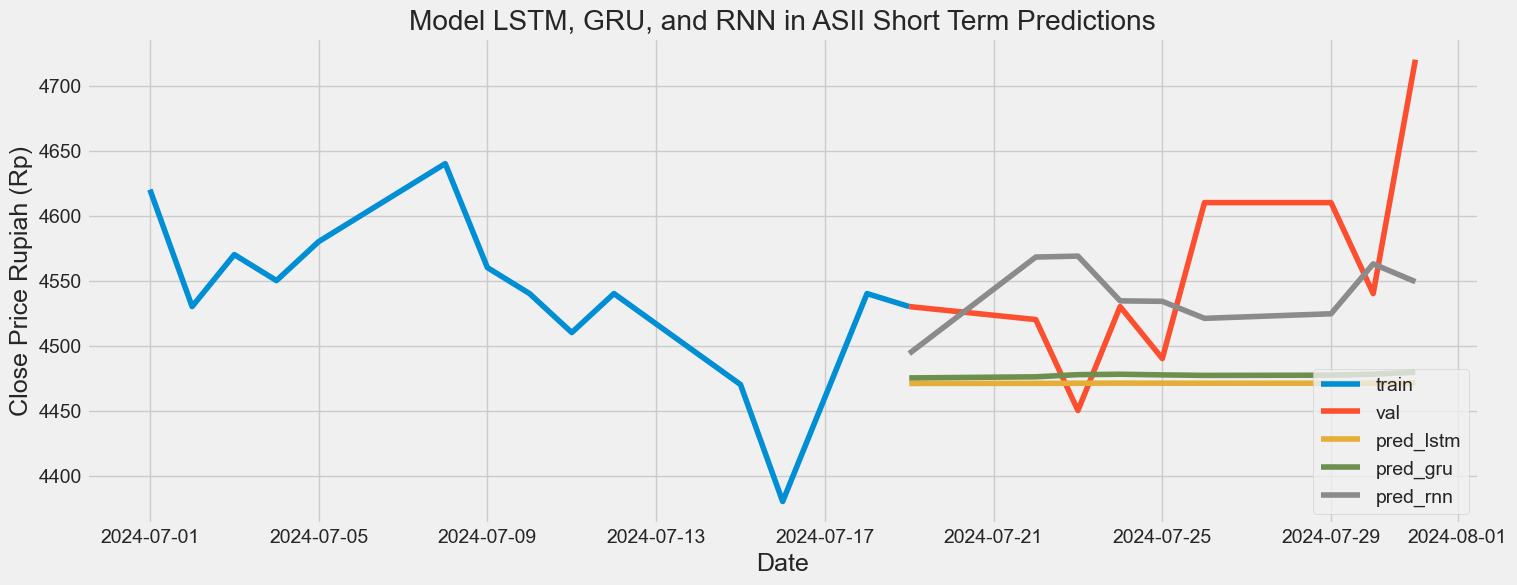

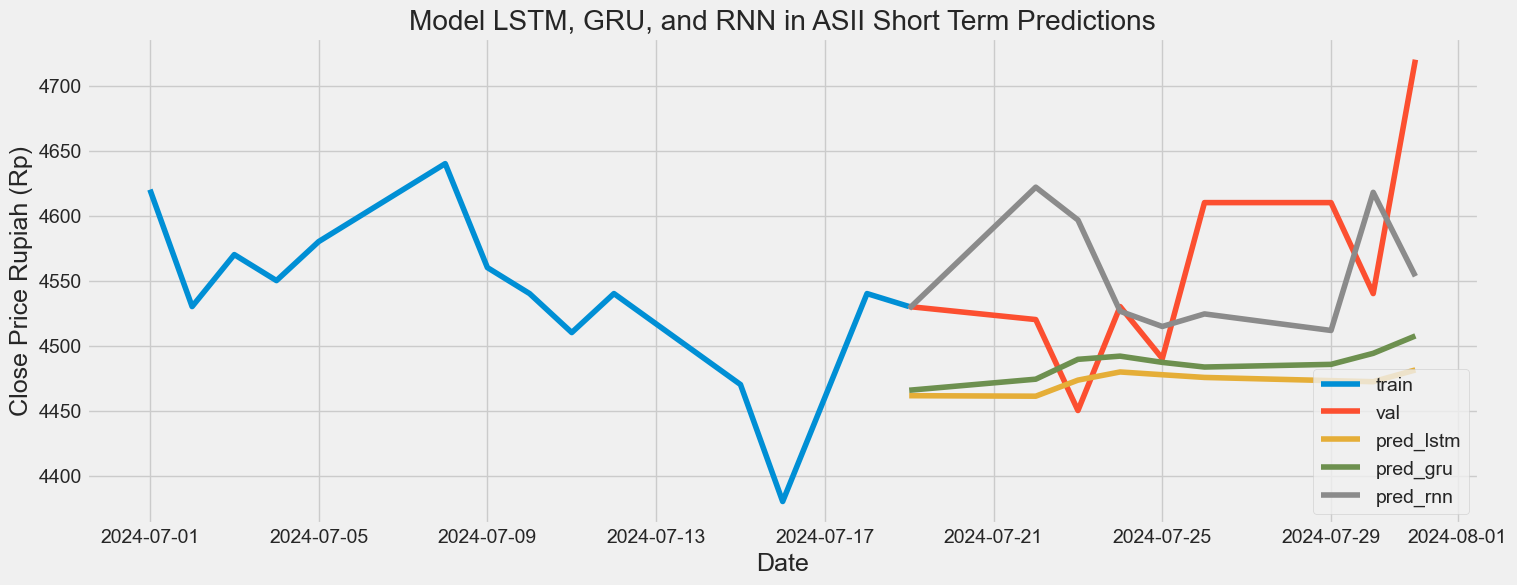

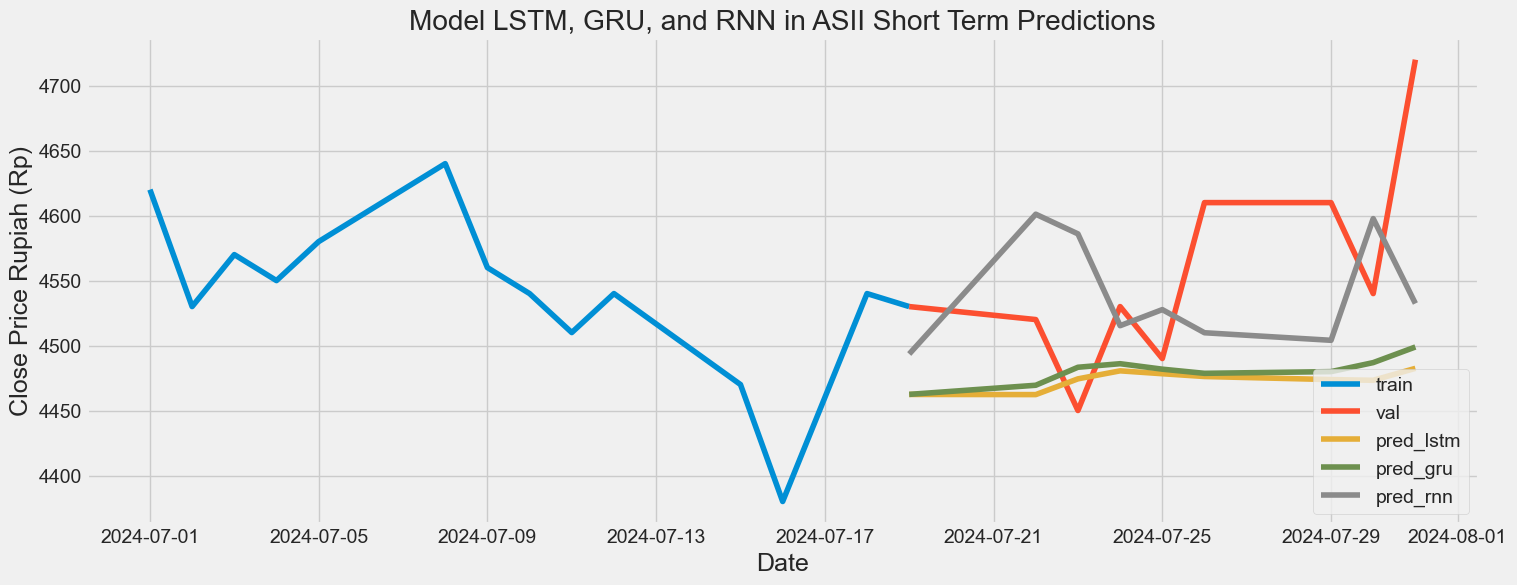

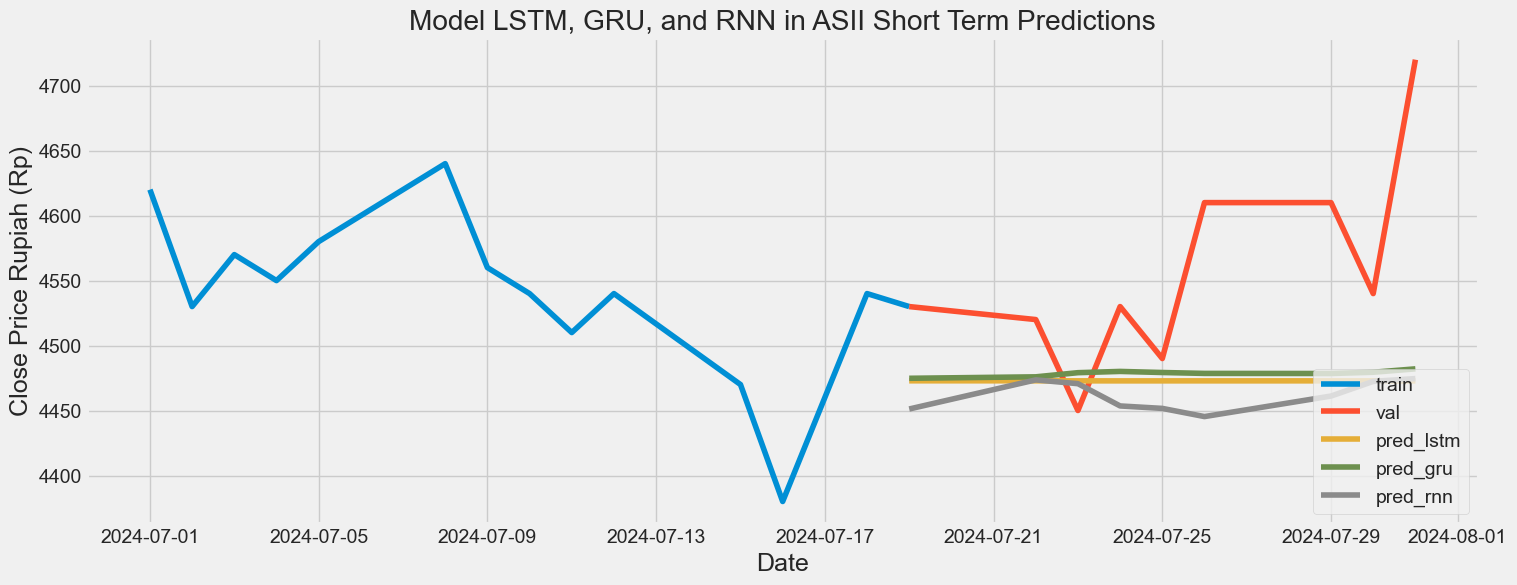

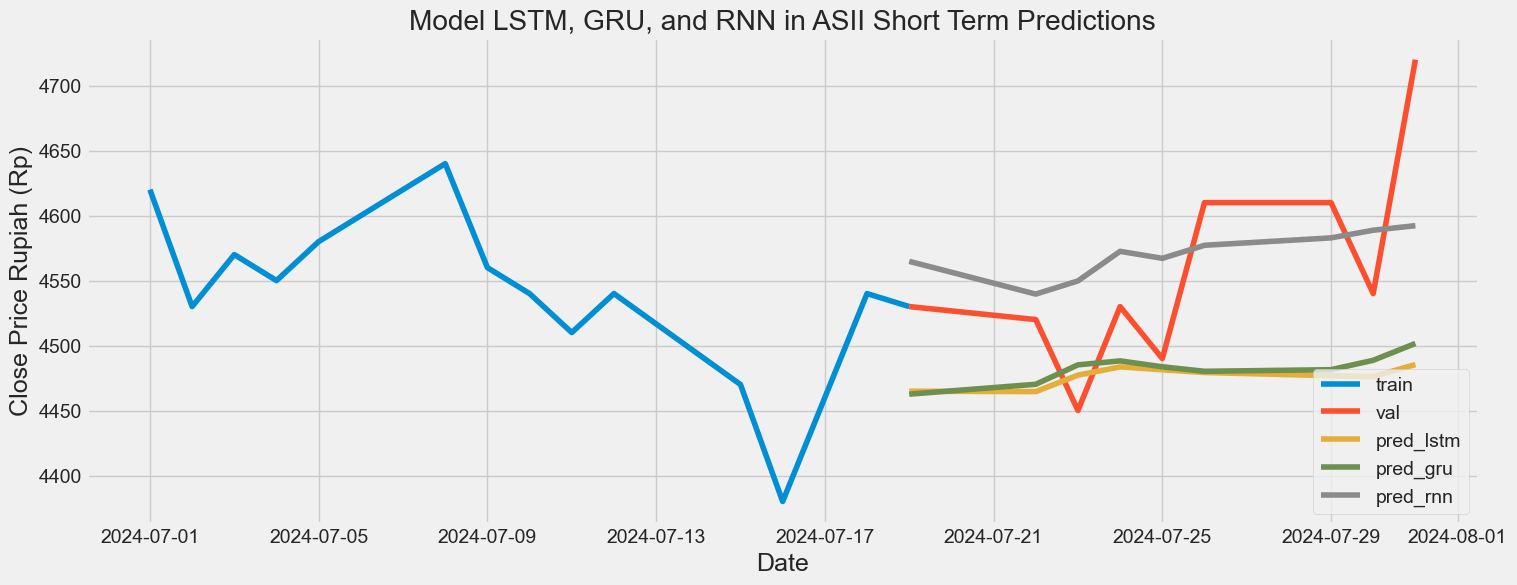

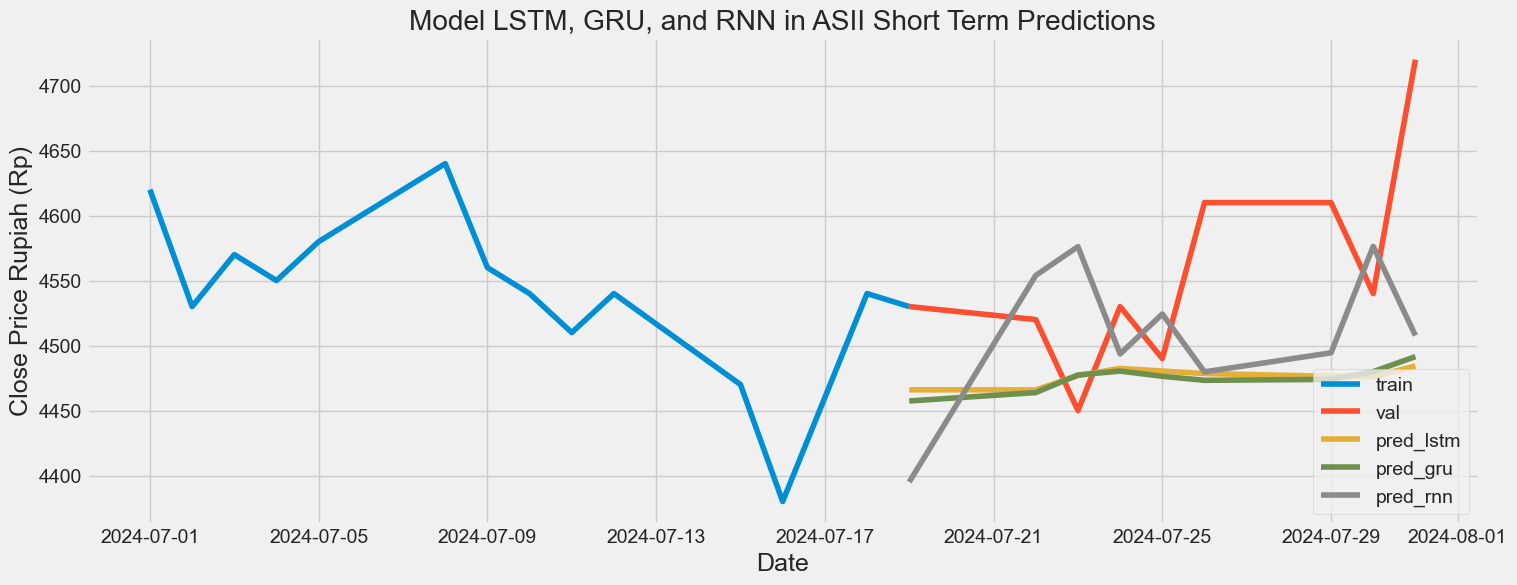

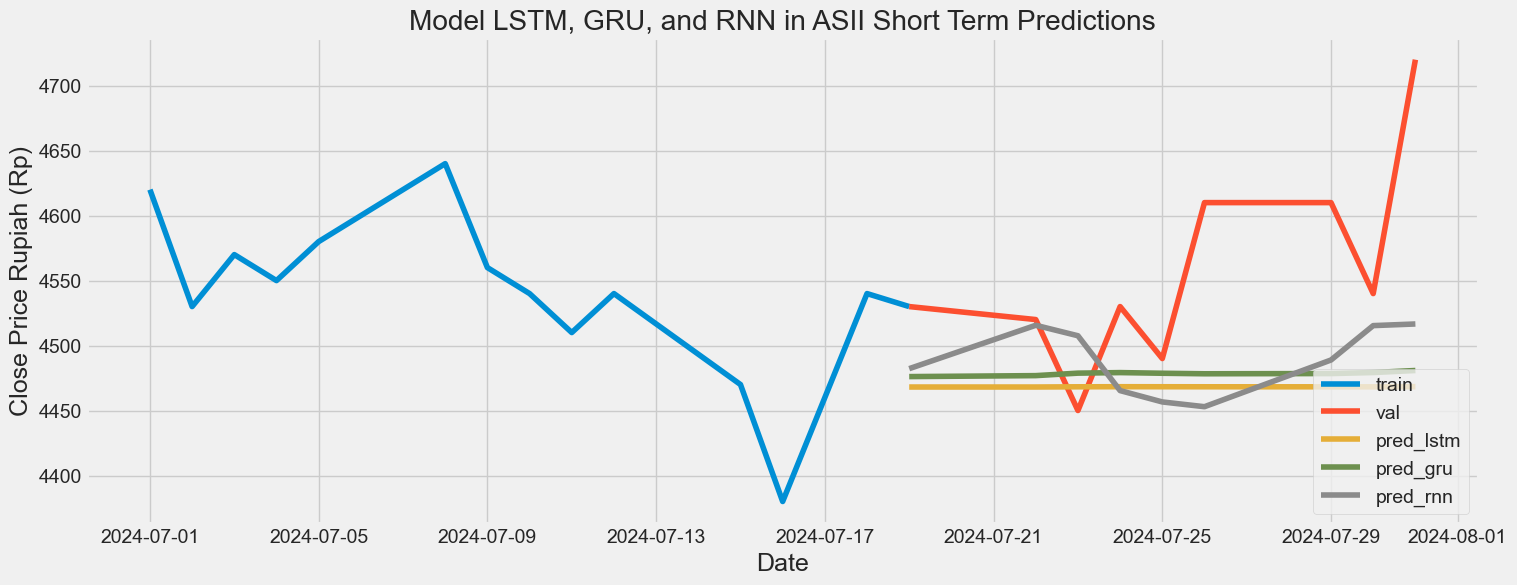

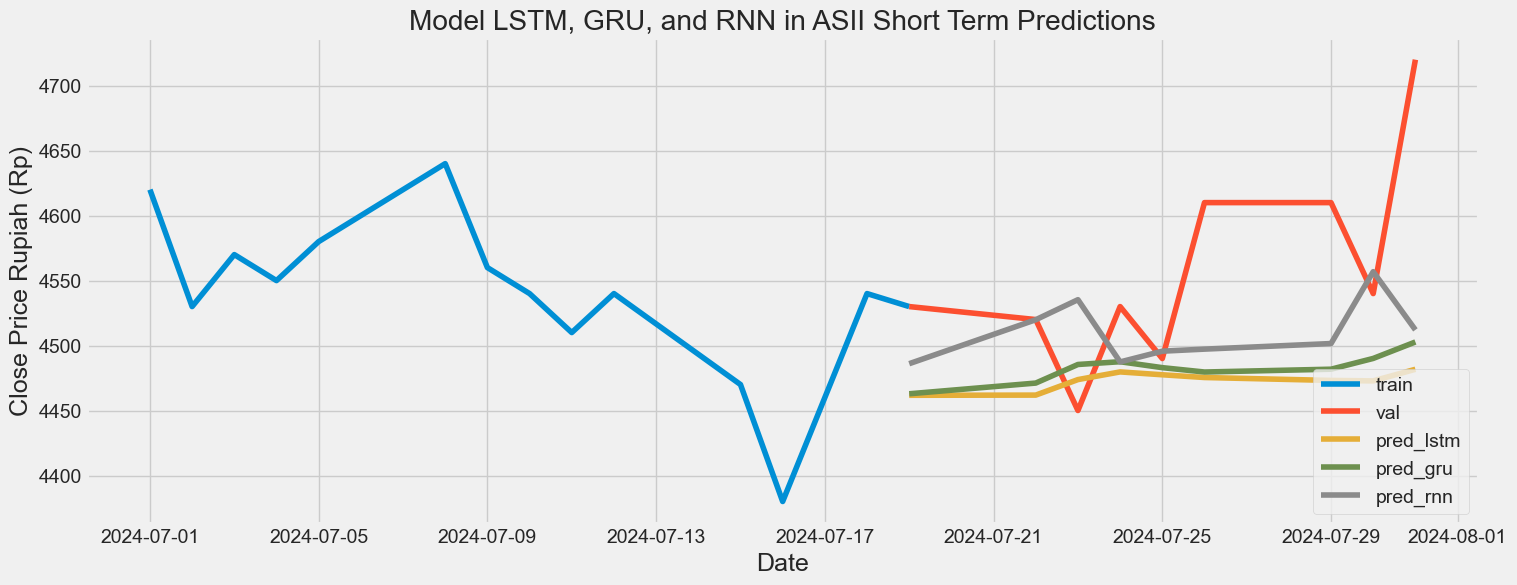

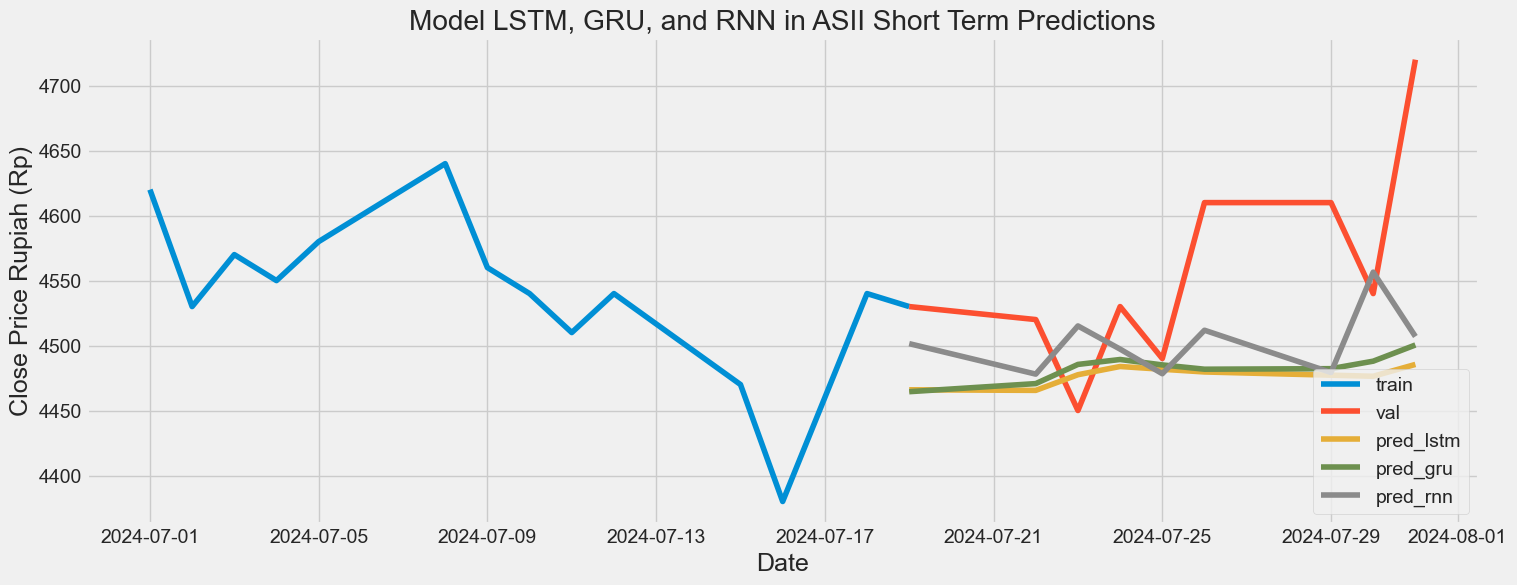

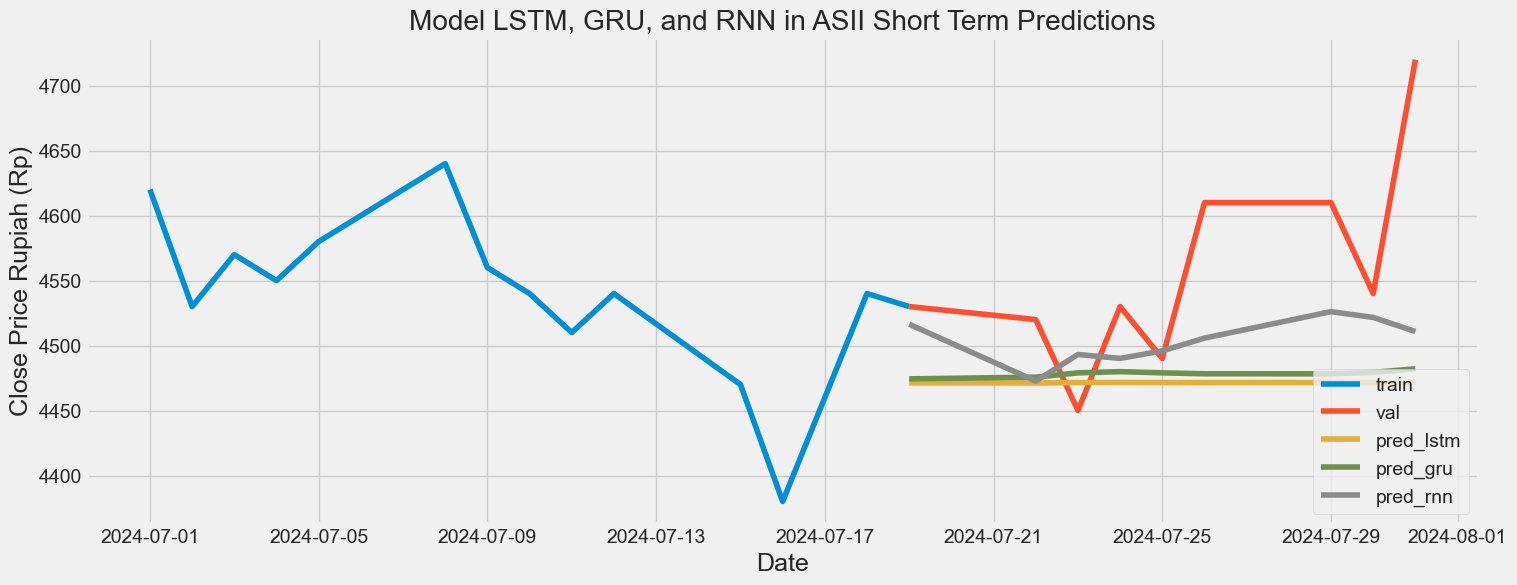

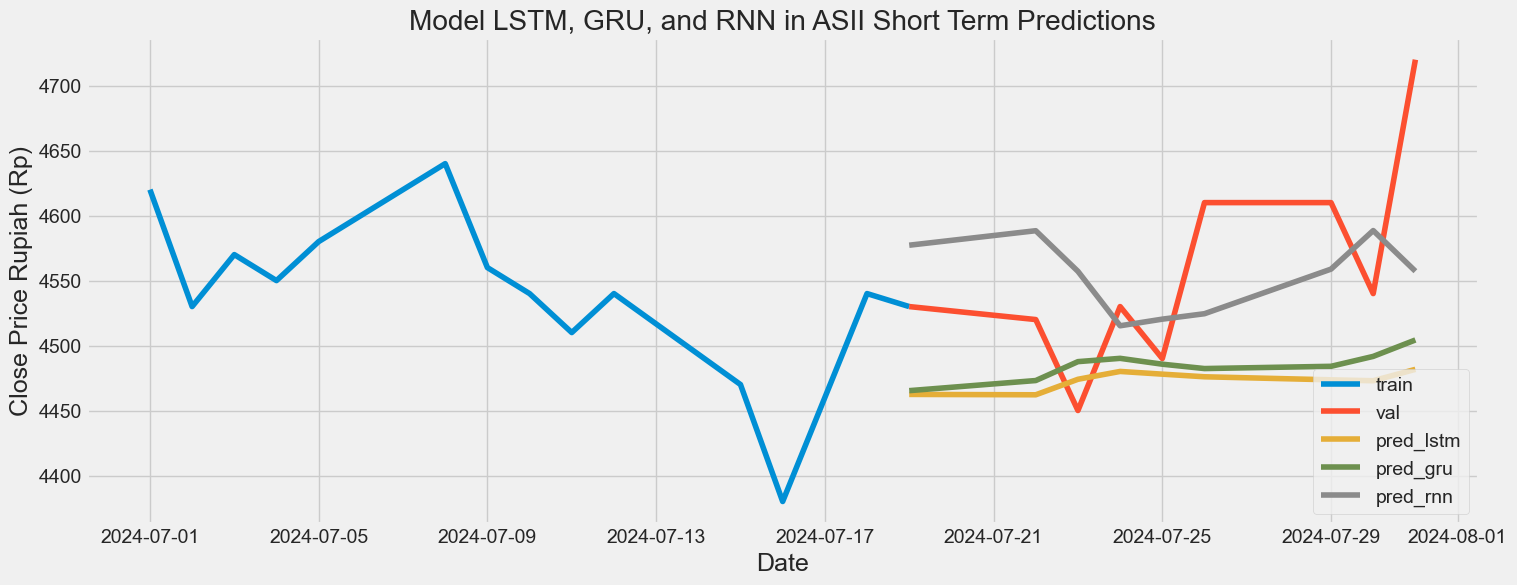

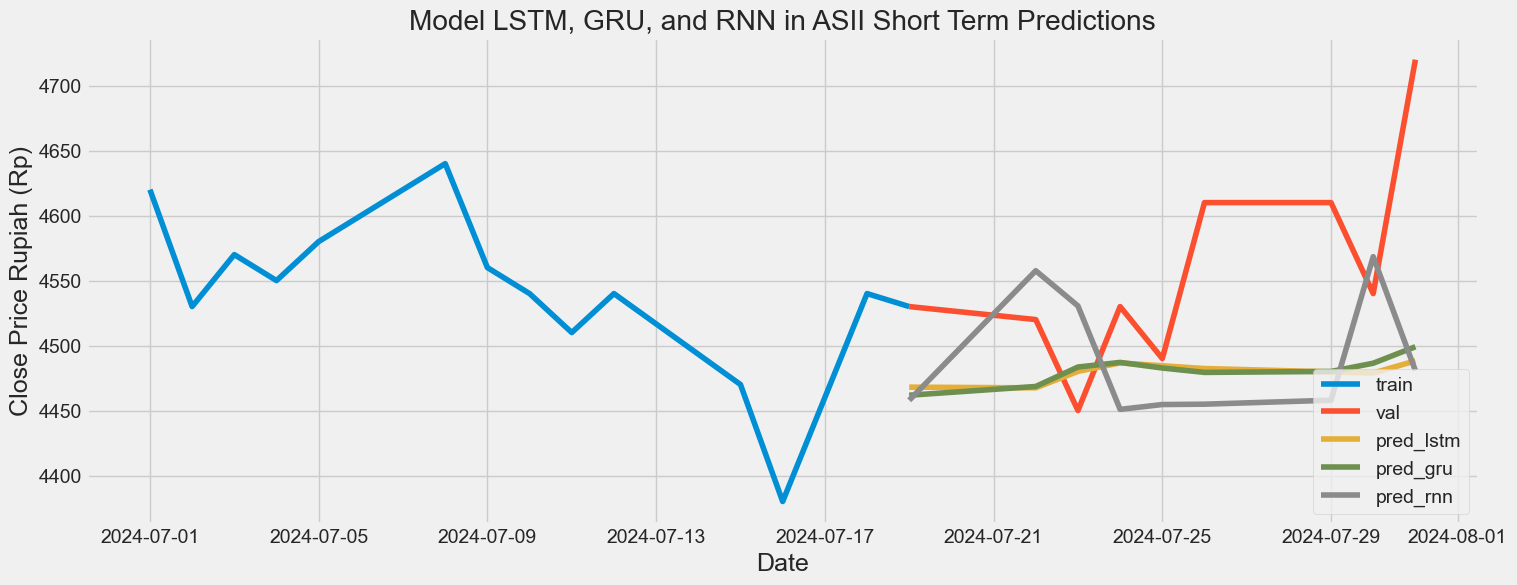

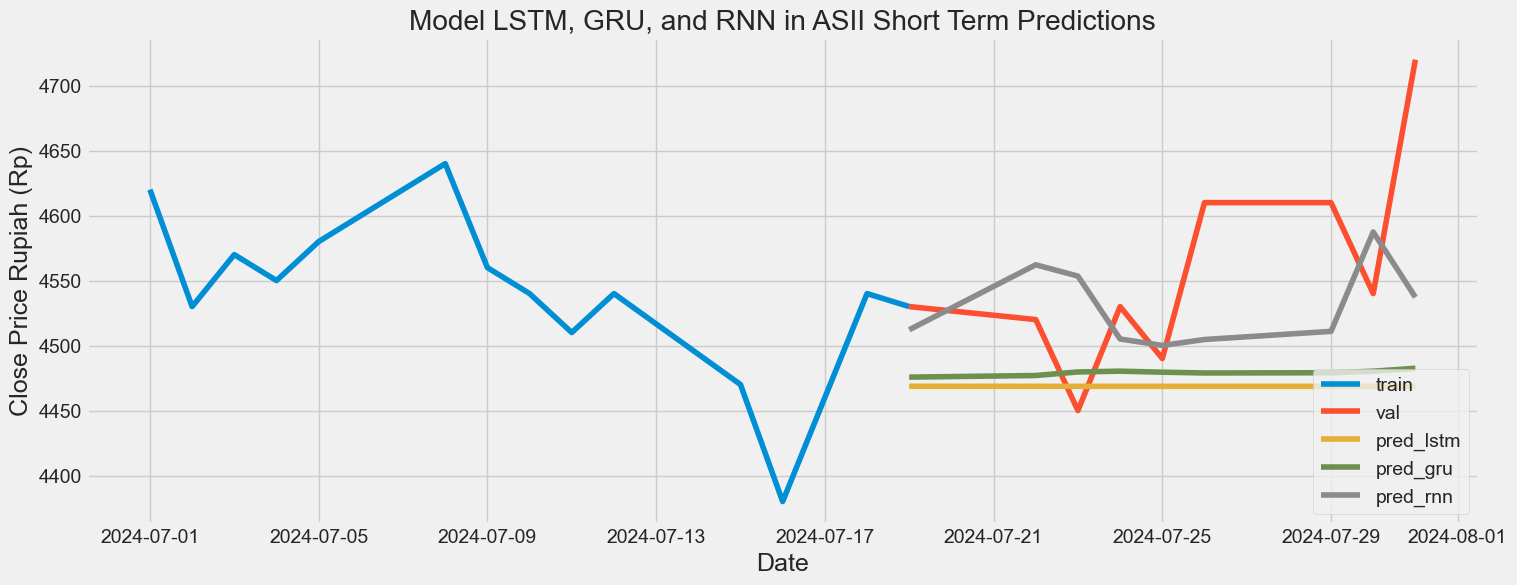

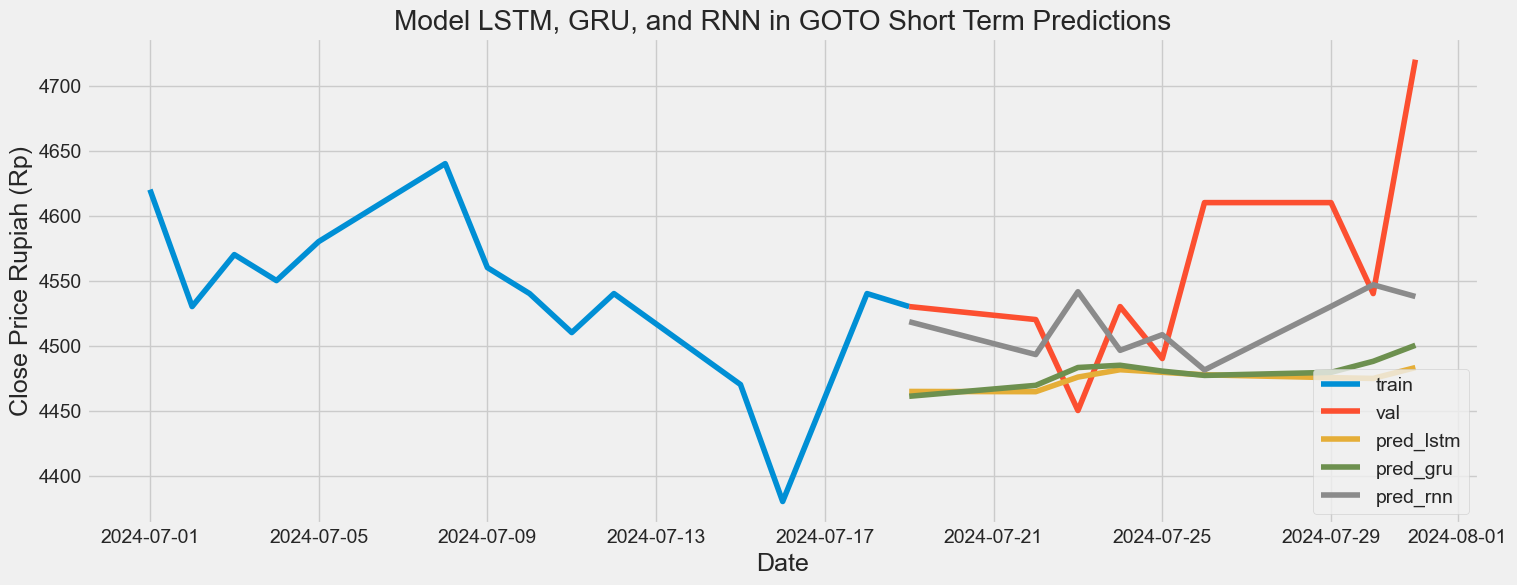

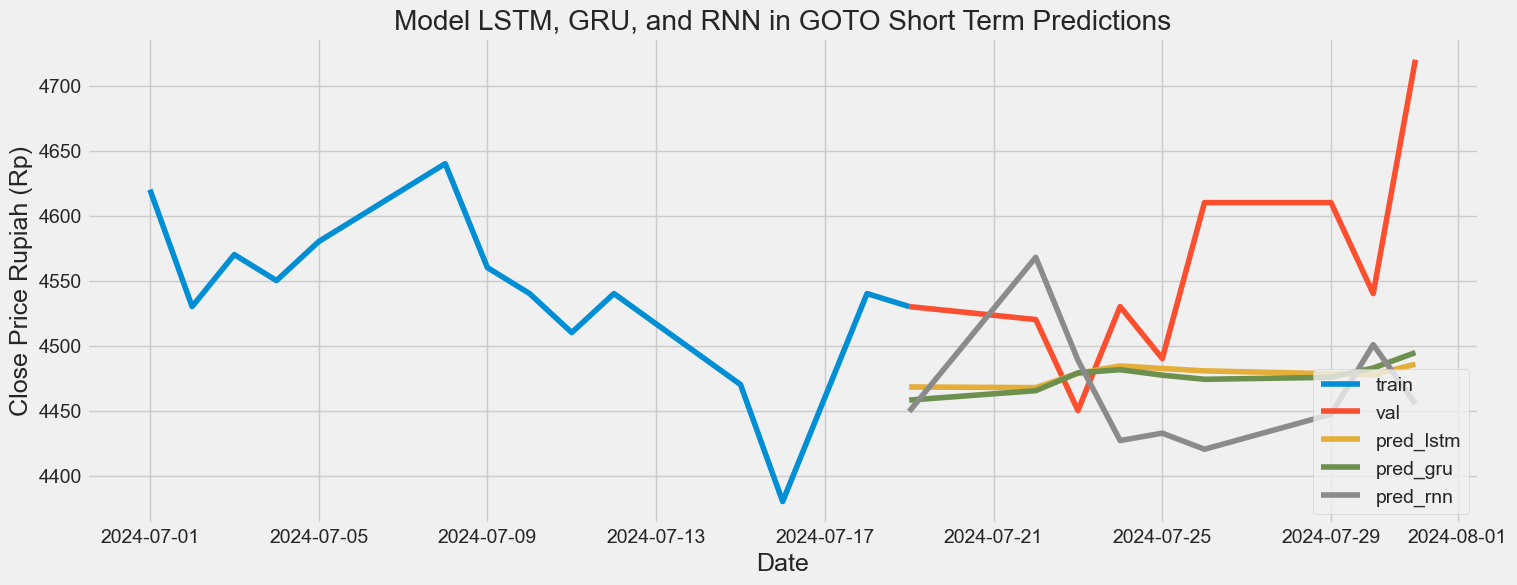

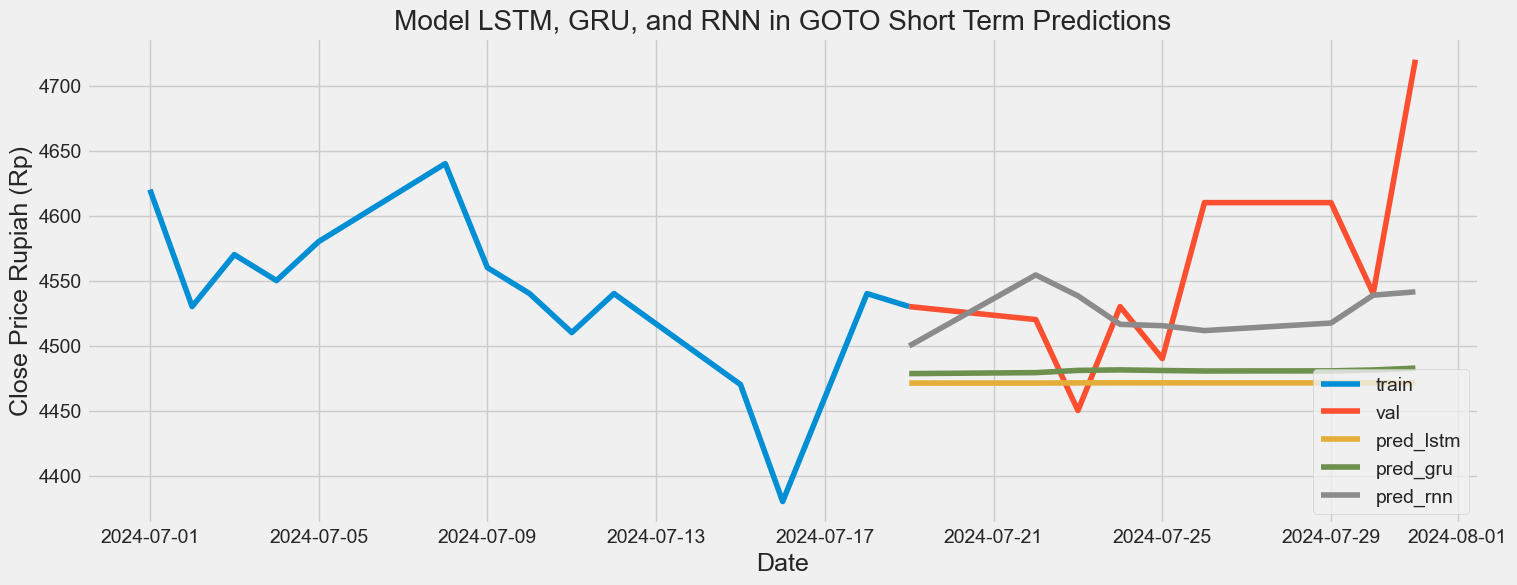

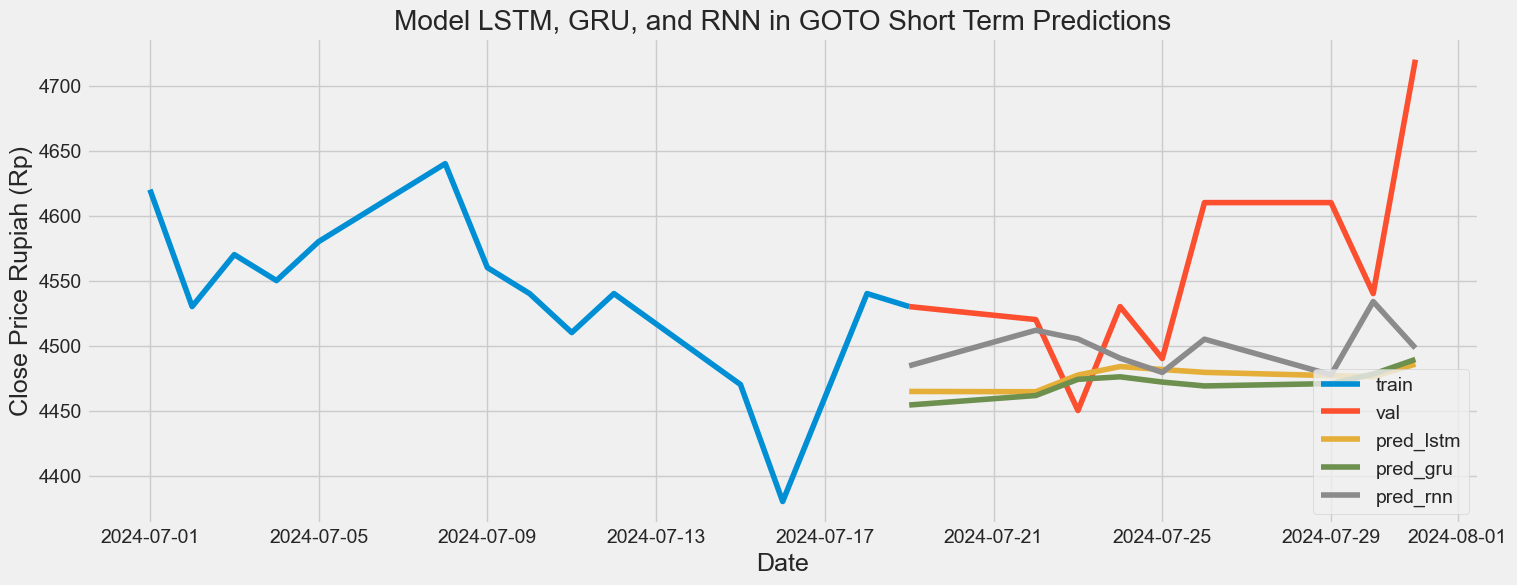

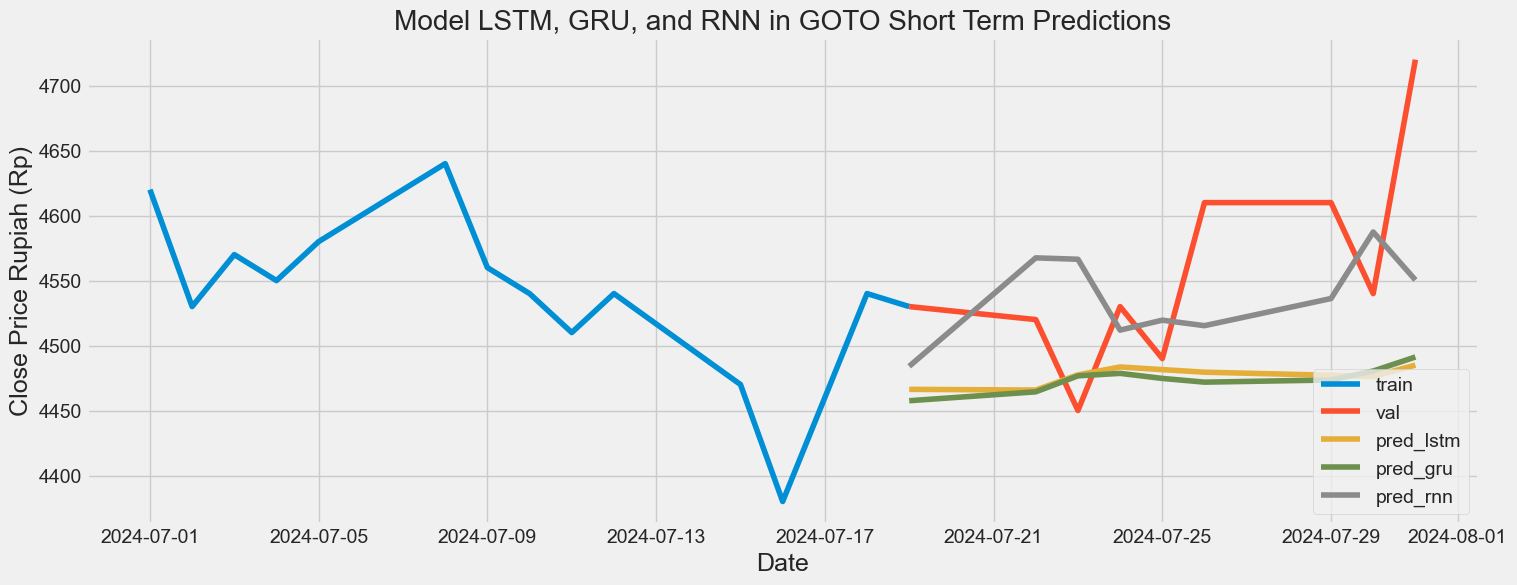

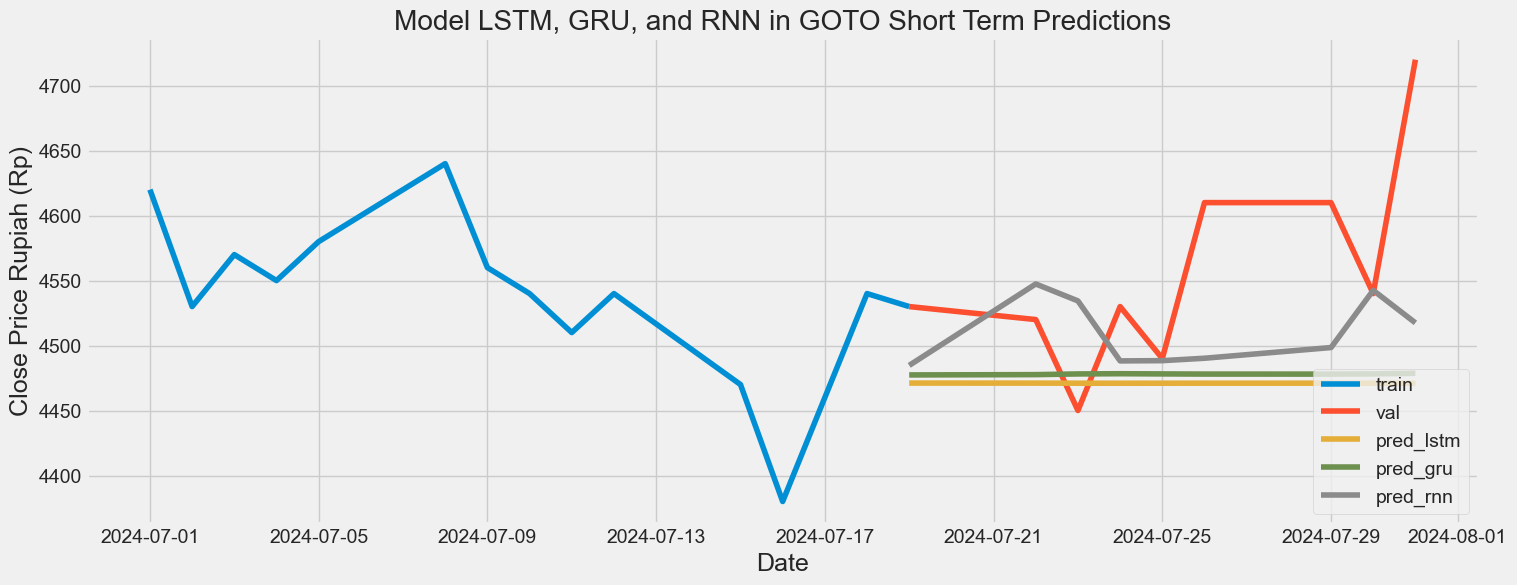

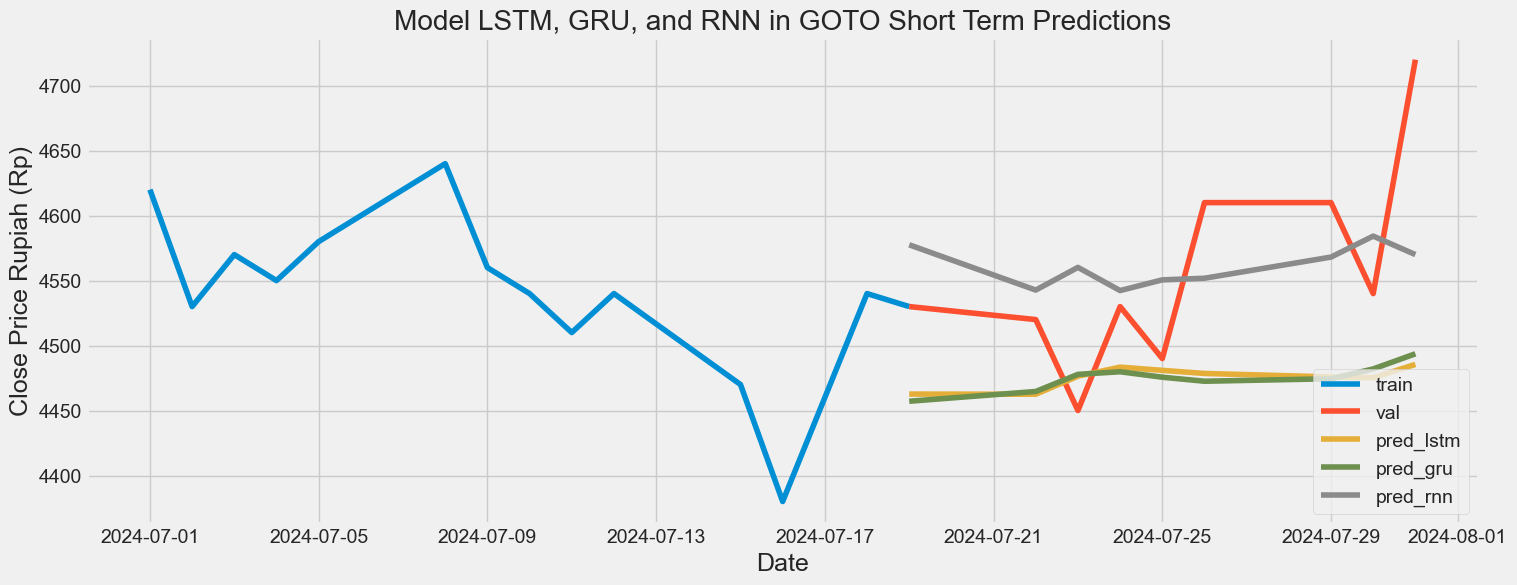

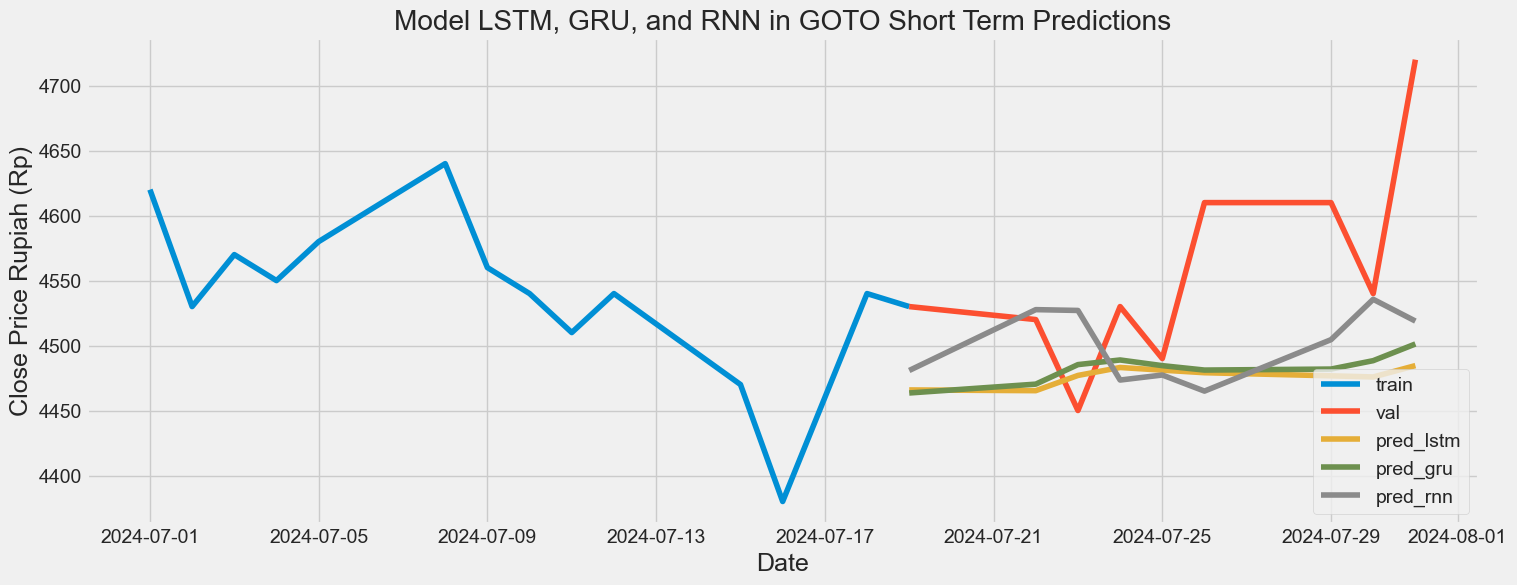

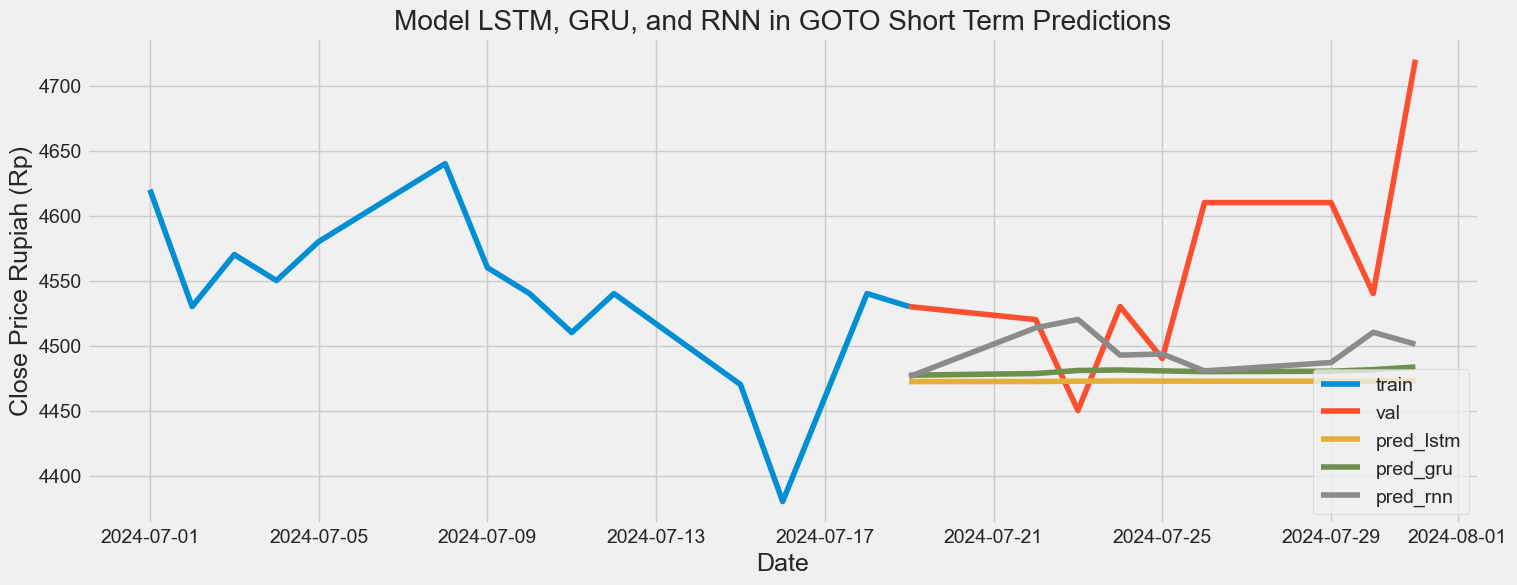

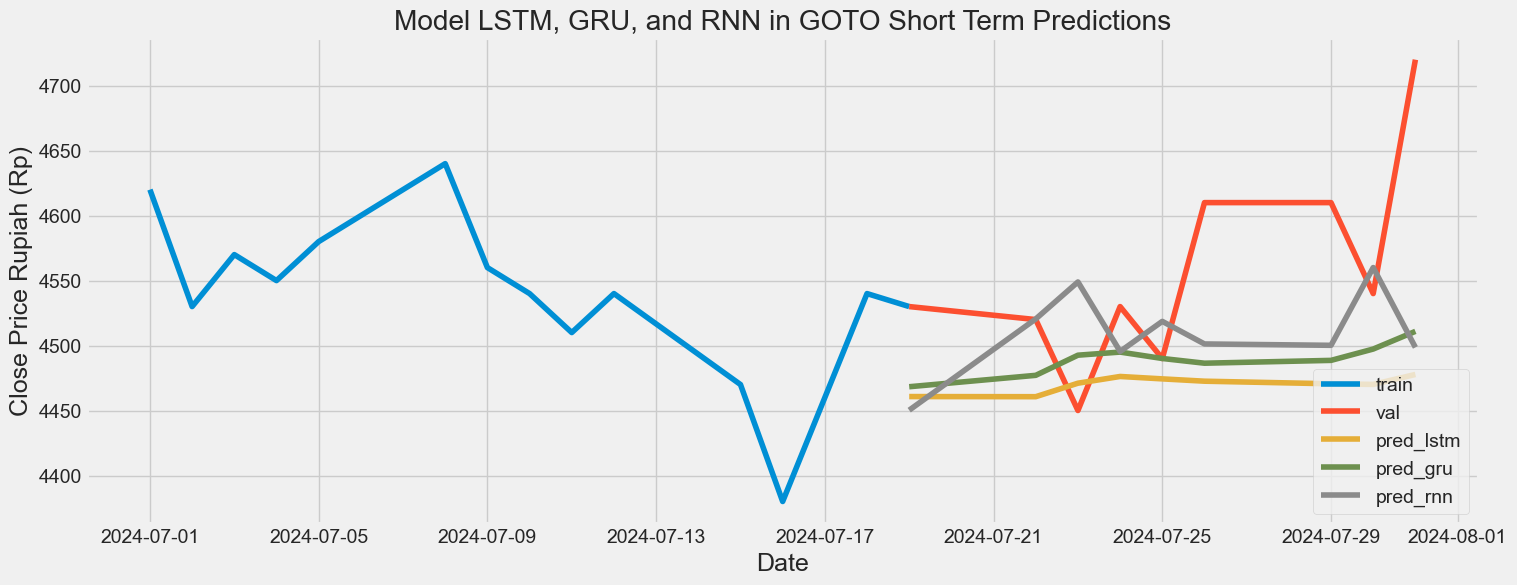

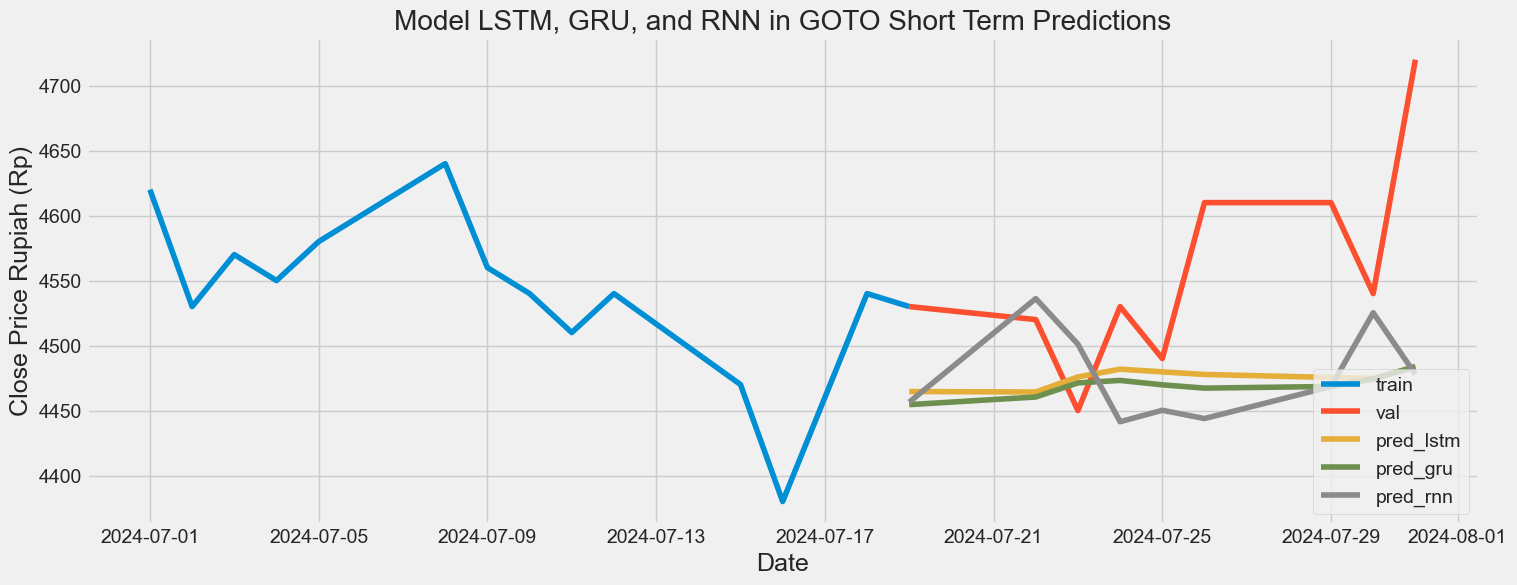

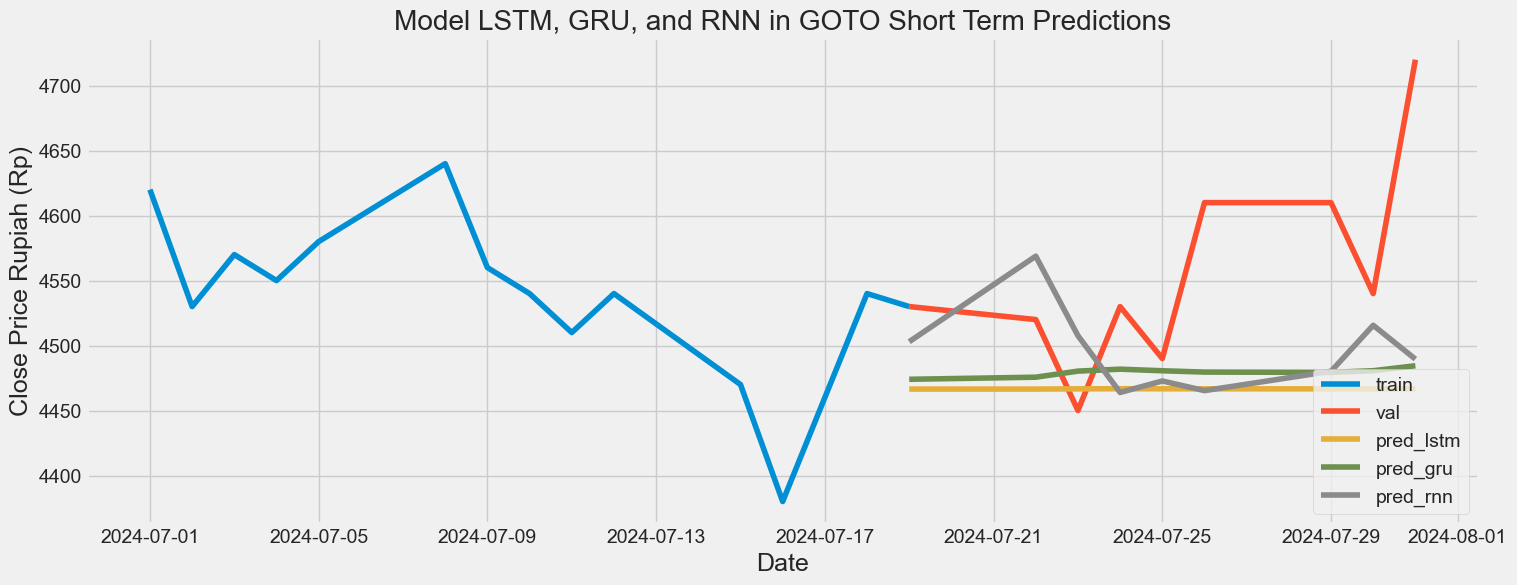

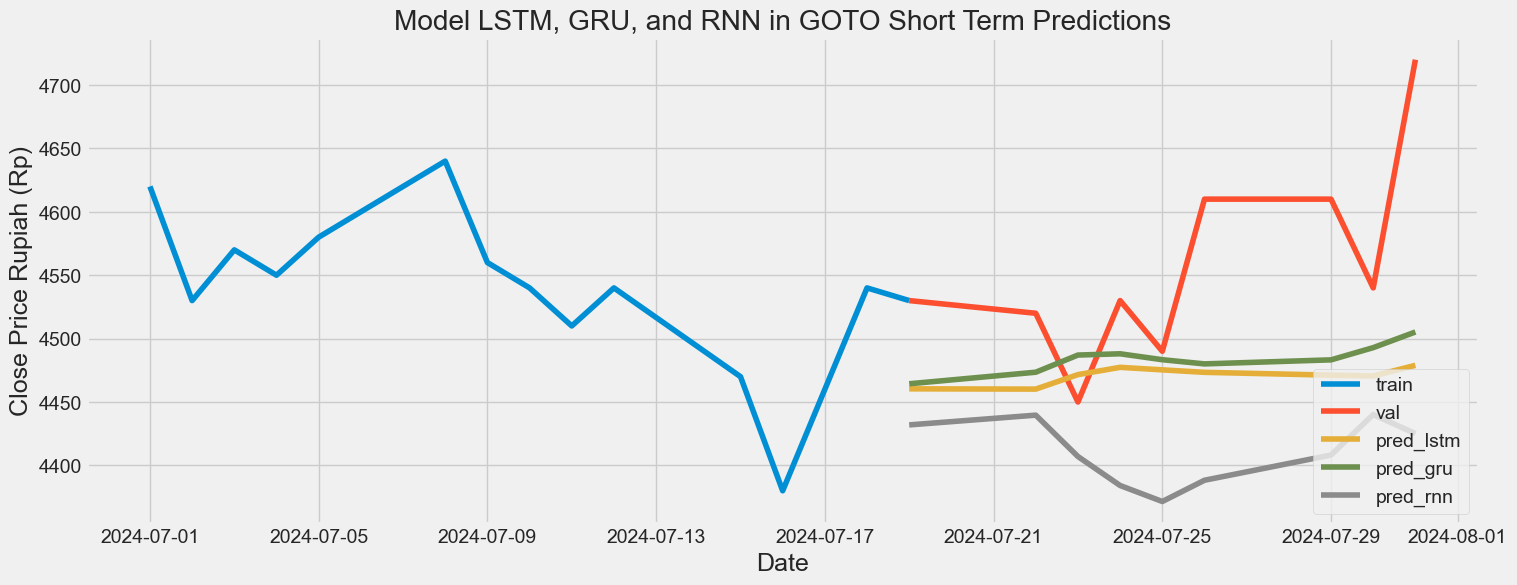

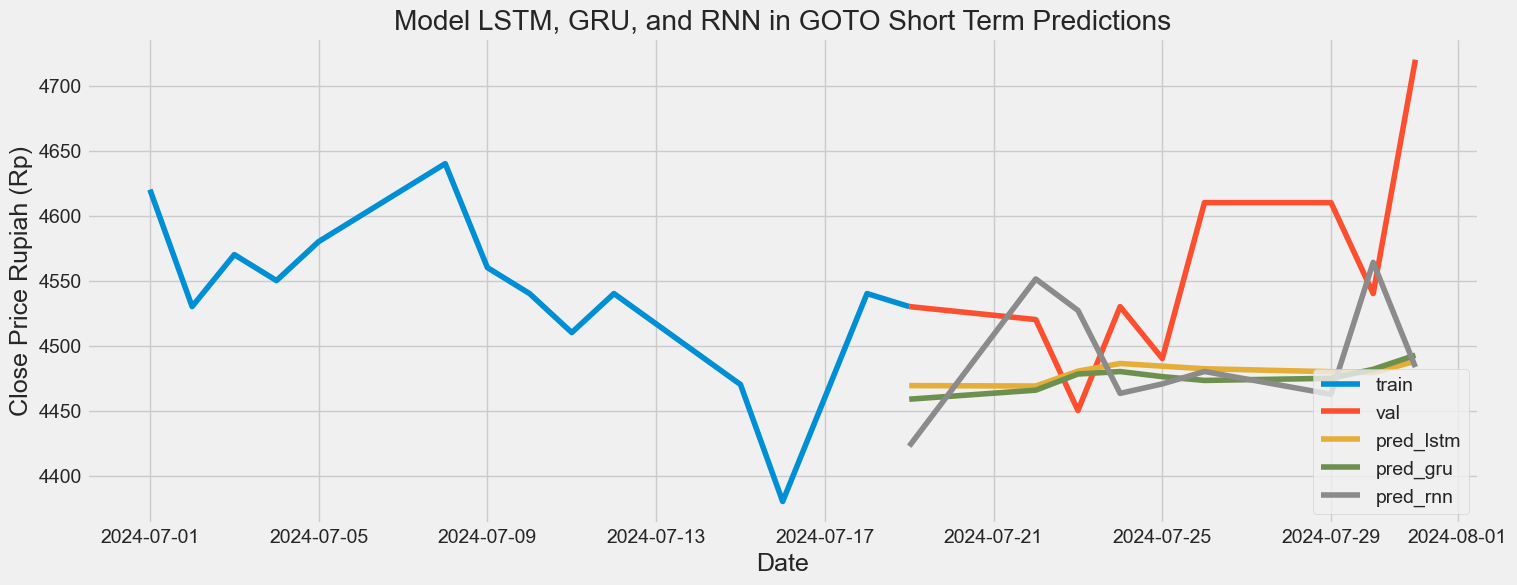

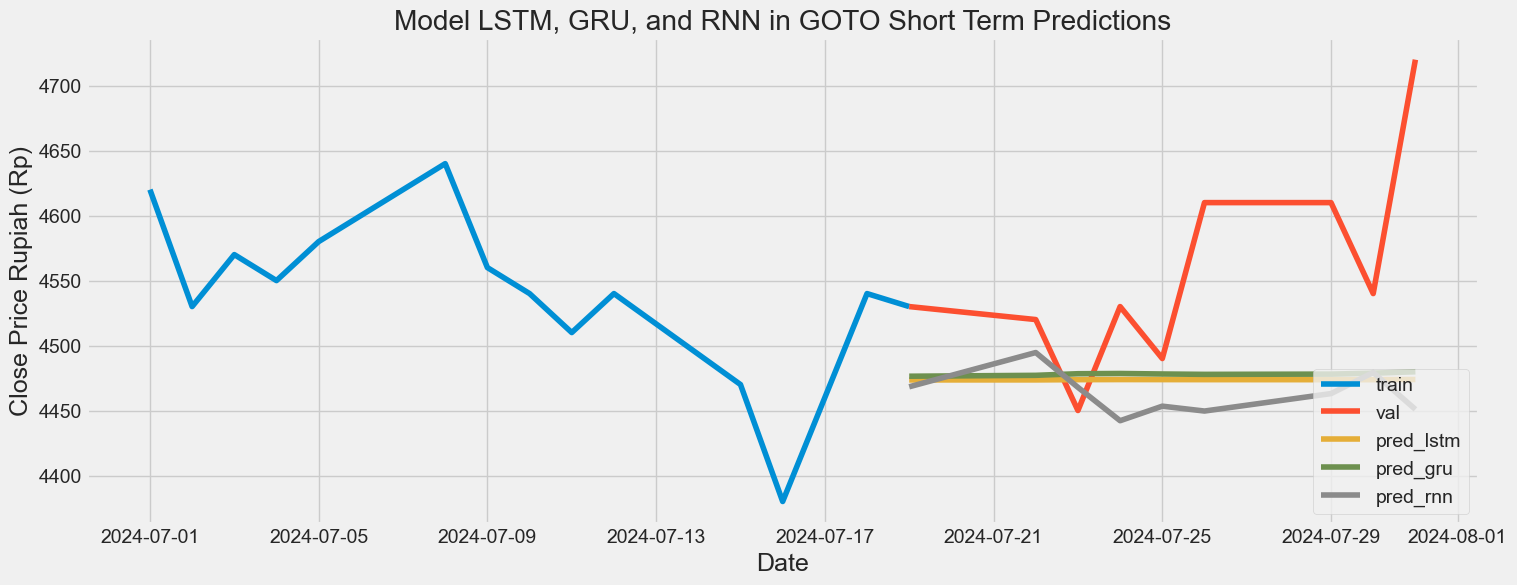

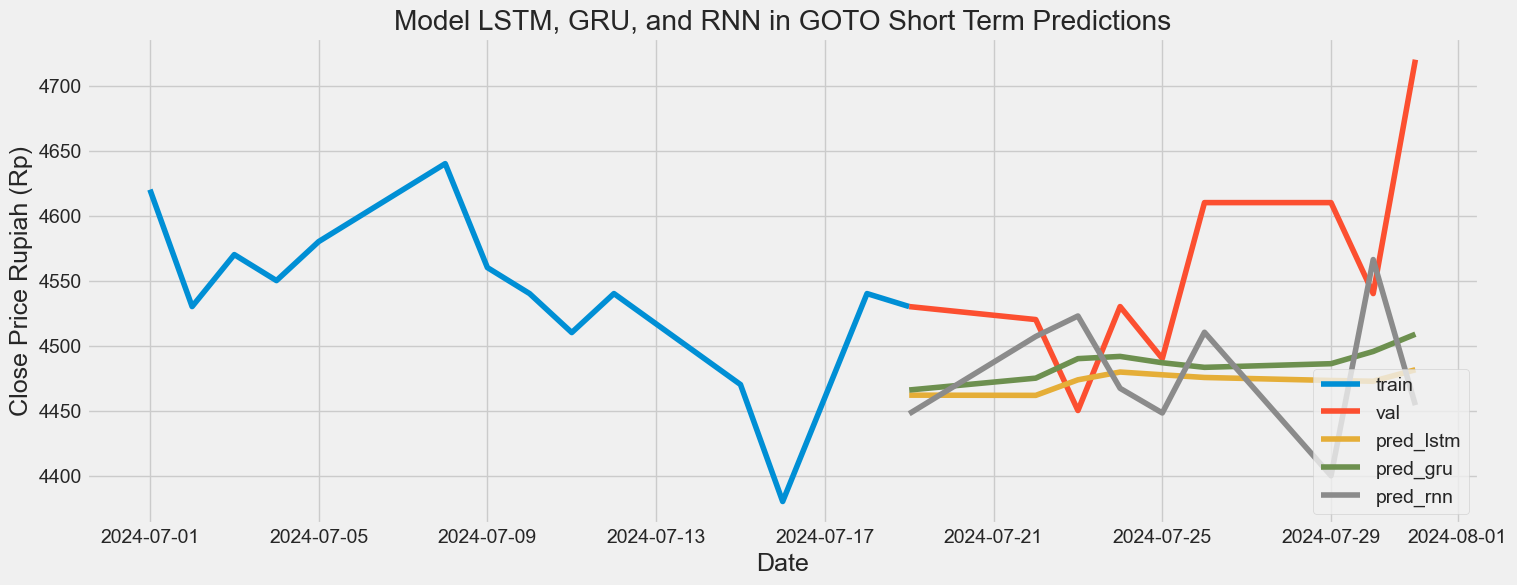

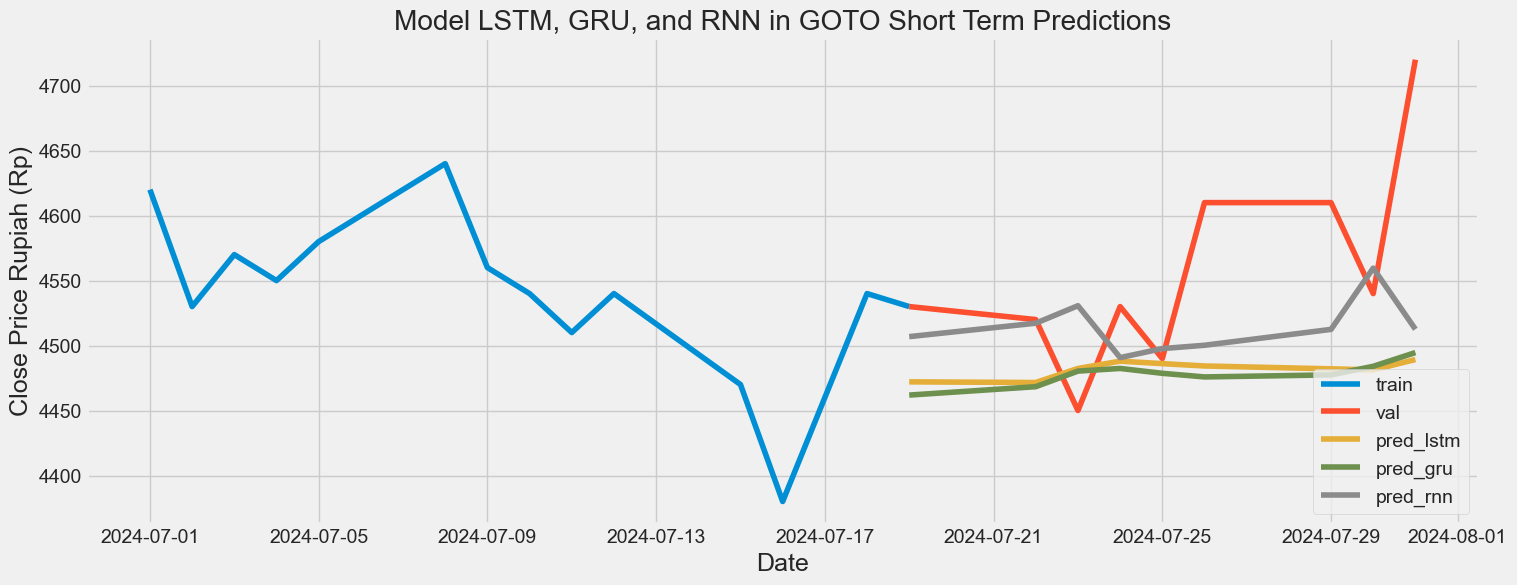

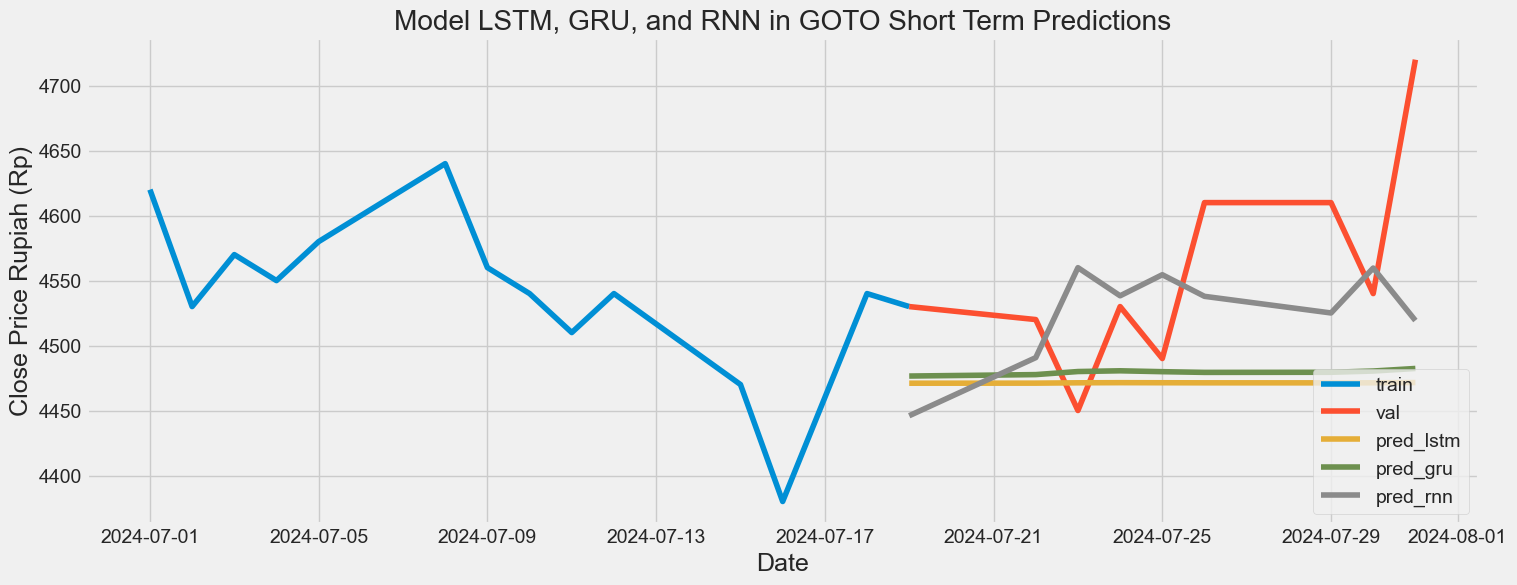

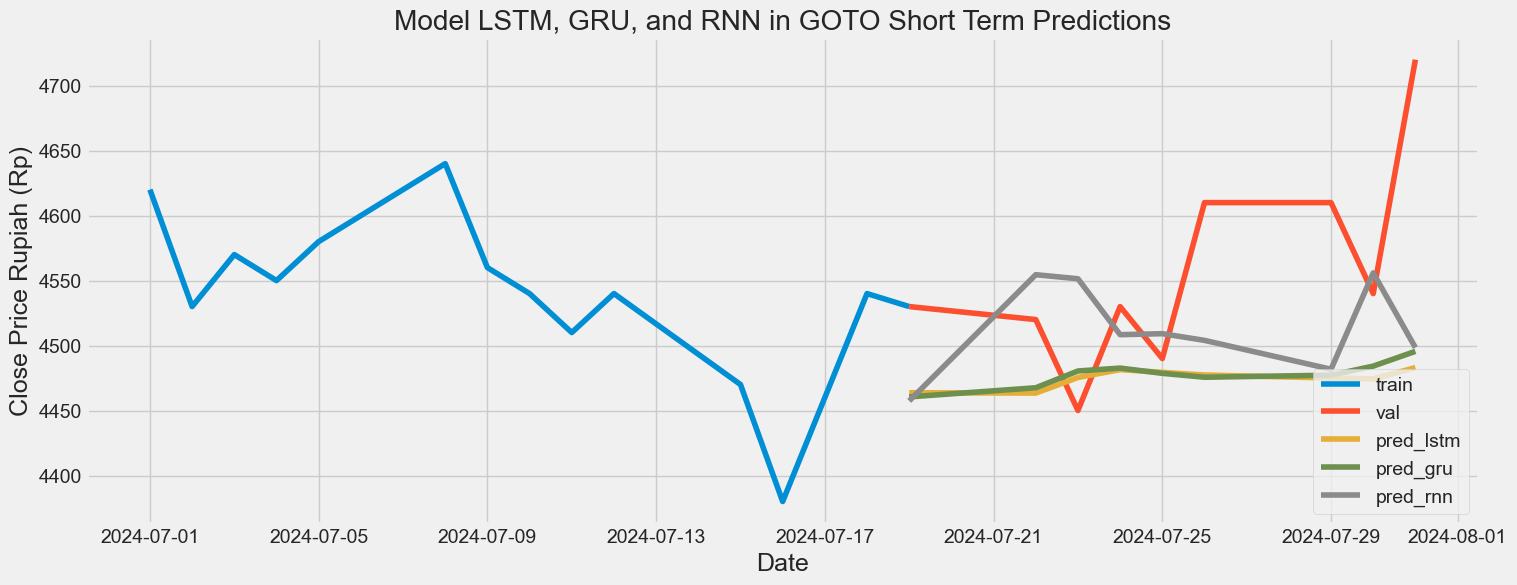

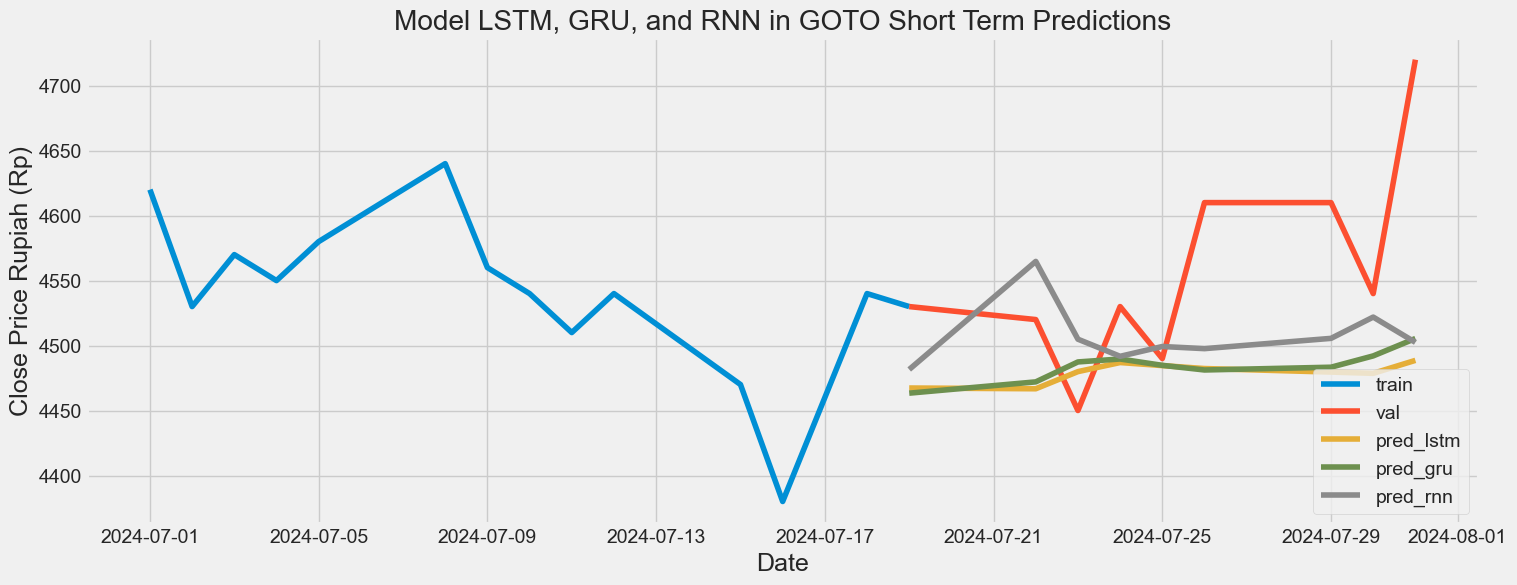

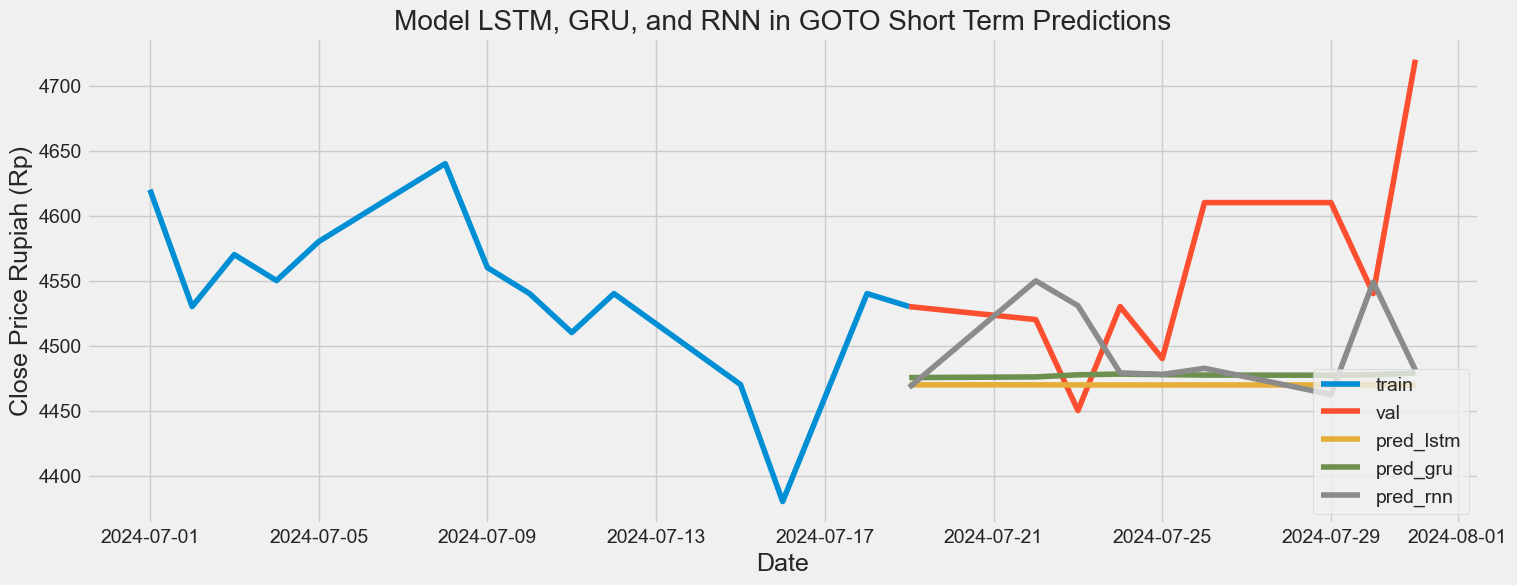

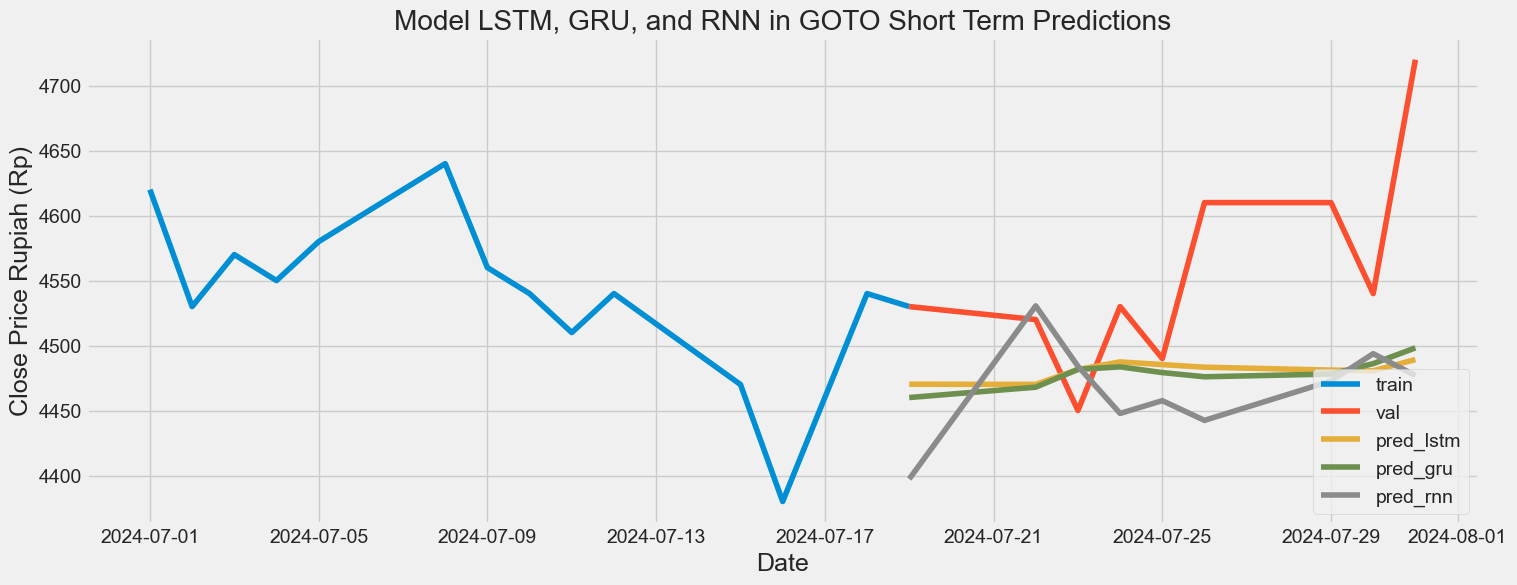

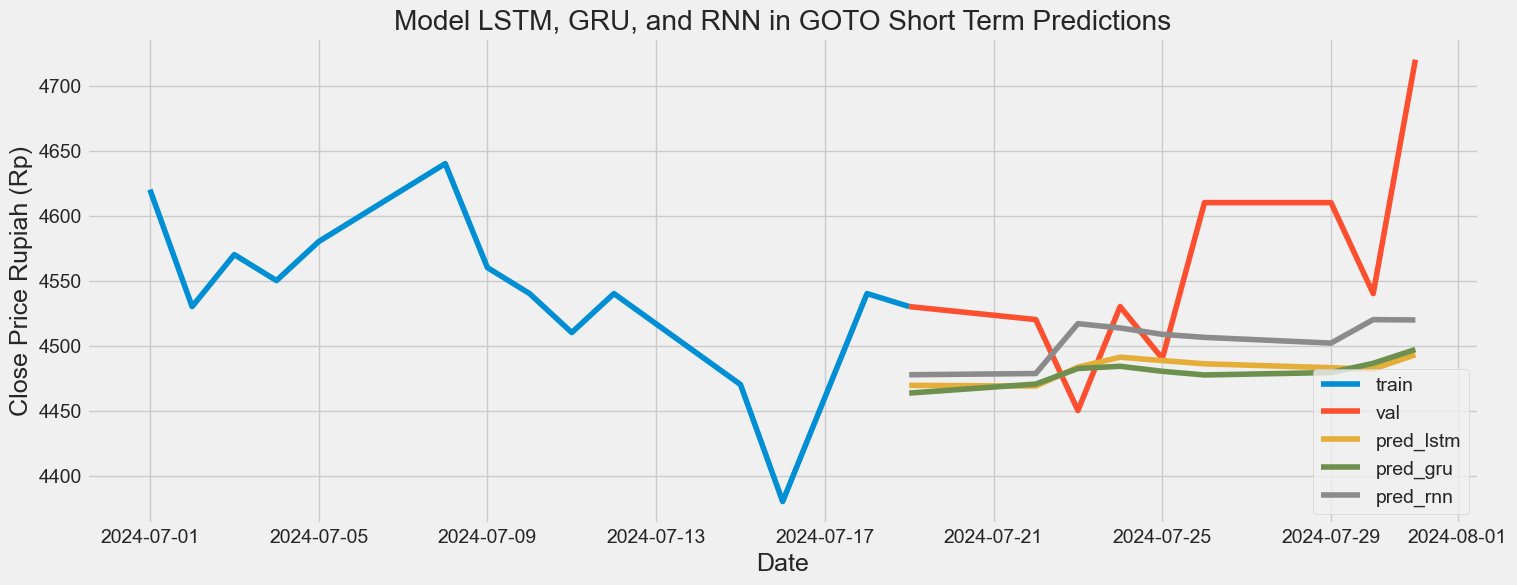

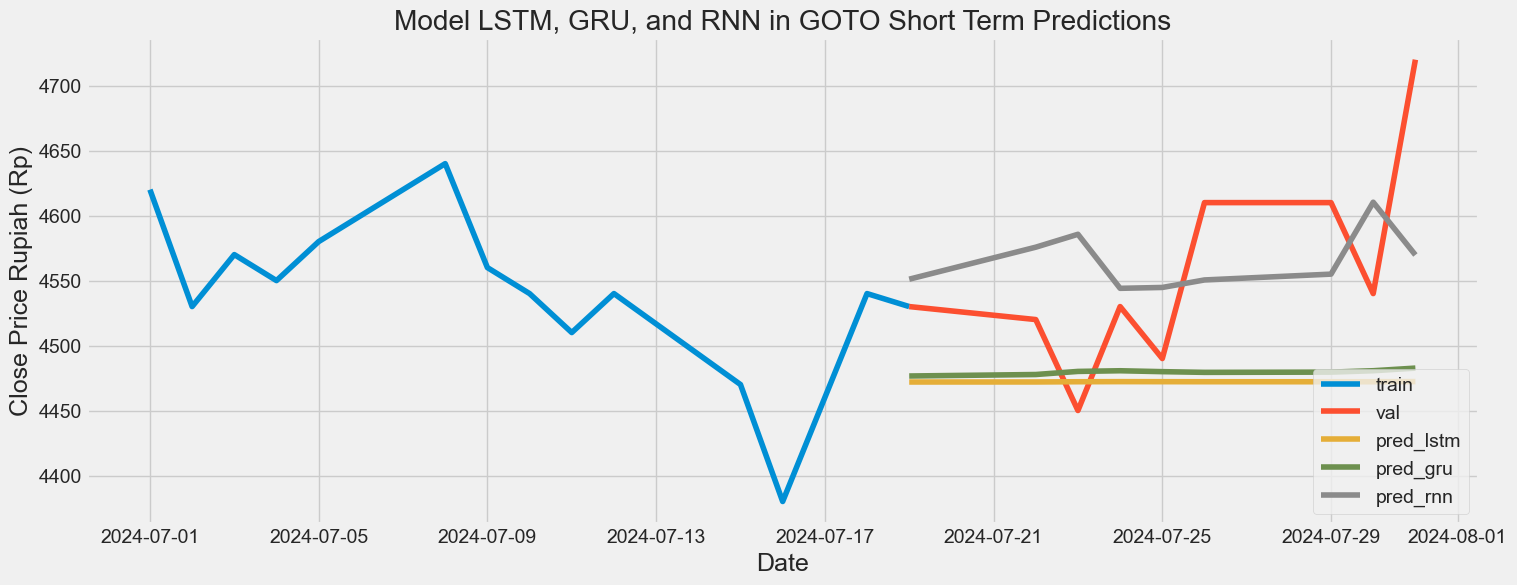

In [92]:
stock_name = ['ASII', 'GOTO']
try_epoch = [50, 100]
try_batch = [32, 64]
try_unit = [50, 100]
try_optimizer = ['rmsprop', 'adam', 'sgd']
for n_name in stock_name:
    if n_name == 'GOTO':
        n_data = GOTO
    elif n_name == 'ASII':
        n_data = ASII
    for n_epoch in try_epoch:
        for n_unit in try_unit:
            for n_batch_size in try_batch:
                for n_optimizer in try_optimizer:
                    train_short(n_data, n_name, start_date, med_date, end_date, n_epoch, n_unit, n_batch_size, n_optimizer)
                

In [ ]:
dic_res_tuning

{'stock': 'ASII',
 'term': 'short',
 'algorithm': 'GRU',
 'rmse': 51.705793371379244,
 'rmse_norm': 0.3693270955098525,
 'epoch': 50,
 'unit': [],
 'optimizer': 'adam',
 'batch_size': 32,
 'units': 50}

#### Long Term Predcitions

### GOTO

#### Short Term Predictions

#### Long Term Predictions